# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73; border-radius: 10px; color:black; height: 48px'><center><h2>Sales Prediction Project</center>

## *Problem Description:*
    
#### *XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.*

#### *You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.*

## Data Description

#### Salesdata.csv - Contains historical data including Sales
#### store.csv  - Contains information about the stores


### <u>Data fields:</u>

* **Id** - An Id that represents a (Store, Date) tuple within the set
*  **Store** - A unique Id for each store
*  **Sales** - The turnover for any given day (Dependent Variable)
* **Customers** - The number of customers on a given day
* **Open** - An indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - Indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. All schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - Indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - Differentiates between 4 different store models: a, b, c, d
* **Assortment** - Describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - Distance in meters to the nearest competitor store
* **CompetitionOpenSince [Month/Year]** - Gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - Indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since [Year/Week]** - Describes the year and calendar week when the store started participating in Promo2
* **PromoInterval** - Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Business Problem

The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. 

Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. 

For a good sales forecast, it is also extremely important to get a good dataset. 

Forecasts heavily depend on the records, trends, and patterns observed for sales of a particular store. The variations could be due to several reasons.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

## <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Approach</center></h1>

### [**Data Collection and Preprocessing**](#title-one)

* Importing important libraries and modules
* Data Cleaning
* Missing Data Handling
* Merging the Datasets

### [**Exploratory Data Analysis**](#title-two)

* Hypotheses
* Categorical Features
* Continuous Features
* EDA Conclusion and Validating Hypotheses

### [**Feature Selection and Outlier Detection**](#title-three)

* Feature Engineering
* Outlier Detection and Treatment
    
### [**Modeling**](#title-four)

* Train Test Split
* Baseline Model - Decision Tree
* Random Forest Model
* Random Forest Hyperparameter Tuning
* Random Forest Feature Importance

### [**Model Performance and Evaluation**](#title-five)

* Visualizing Model Performances
* Random Forest vs Baseline Model
* Random Forest Tuned vs Baseline and Random Forest Models
    
### [**Store wise Sales Predictions**](#title-six)

### [**Conclusion**](#title-seven)

### [**Recommendations**](#title-eight)

</div>

### <a id='top'></a> <a id="title-one"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Data Collection and Preprocessing</center></h1>

### In this section, we will load the sales and store data, and perform initial exploration to understand the dataset structure and key statistics.


<a id="title-one"></a>

In [1]:
#Importing important libraries and modules

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime
import os
import warnings    
warnings.filterwarnings('ignore')

In [2]:
# Set the working directory
os.chdir('F:/Data_Science_LB/Project')

#### Load the dataset and perform initial exploration to understand the structure and key statistics.

In [3]:
# Load data
sales_data = pd.read_csv('Salesdata.csv')
store_data = pd.read_csv('store.csv')

In [4]:
# Display the first few rows of sales data
print("Sales Data:")
sales_data.head()

Sales Data:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


In [5]:
# Display the first few rows of store data
print("Store Data:")
store_data.head()

Store Data:


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
#info about the sales dataset
print("Sales Data:")

sales_data.info()

Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
#info about the store dataset
print("Store Data:")

store_data.info()

Store Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
# Basic statistics
print("Sales Data:")

sales_data.describe()

Sales Data:


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
print("Store Data:")

store_data.describe()

Store Data:


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [10]:
#null values in stores
print("Store Data:")

store_data.isnull().sum()

Store Data:


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

#### Out of 1115 entries there are missing values for the columns:
* Competition Distance - distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly.

* Competition Open Since Month- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Competition Open Since Year-  gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month    
* Promo 2 Since Week, Promo 2 Since Year and Promo Interval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.      

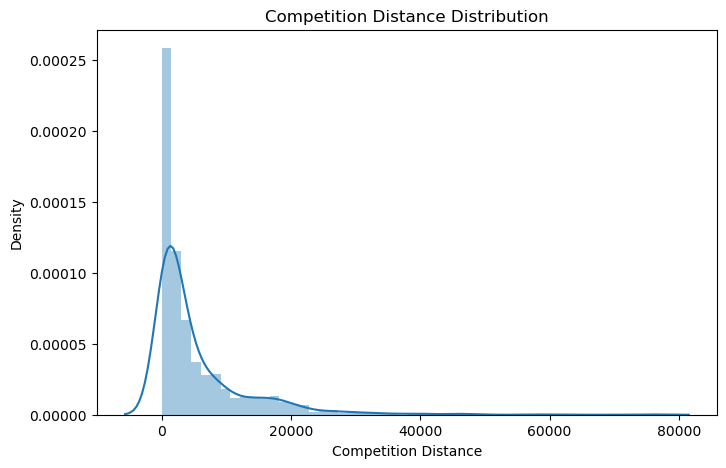

In [11]:
# Distribution plot of competition distance
sns.distplot(x=store_data['CompetitionDistance'], hist = True)
plt.title('Competition Distance Distribution')
plt.xlabel('Competition Distance')
plt.ylabel('Density')
plt.show()

#### As most of the values of the Competition Distance are towards the left hand side, and the distribution is skewed on the right hand side. 
#### <u> Median is more robust to outlier effect.

In [12]:
# filling competition distance with the median value

store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [13]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [14]:
# imputing the nan values of promo2 related columns with 0
store_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_data['Promo2SinceYear'].fillna(value=0,inplace=True)
store_data['PromoInterval'].fillna(value=0,inplace=True)

In [15]:
#check for null values
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [16]:
# filling competition distance with the median value

store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [17]:
# filling competition open since month and year with modes of those columns

store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [18]:
# imputing the nan values of promo2 related columns with 0

store_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_data['Promo2SinceYear'].fillna(value=0,inplace=True)
store_data['PromoInterval'].fillna(value=0,inplace=True)

In [19]:
#check for null values

store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Merging the two Datasets

In [20]:
#merge the datasets on stores data

# Load the store data
store_data = pd.read_csv("store.csv")

# Load the sales data
sales_data = pd.read_csv("Salesdata.csv", parse_dates=['Date'])

# Merge store data with sales data on the 'Store' column
merge_data = sales_data.merge(right=store_data, on="Store", how="left")

# Save the merged data to a CSV file
merge_data.to_csv("merge_data.csv", index=False)

# Display the first five rows of the merged dataset
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [21]:
#shape of the dataframe

merge_data.shape

(1017209, 18)

In [22]:
#datatypes
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [23]:
#creating a categorical column list

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [24]:
#checking the unique values involved and if all the values are in appropriate datatypes

for col in categorical_variables:
    print(f'Unique values for {col}: {merge_data[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [25]:
#change data type to int 

merge_data['StateHoliday'].replace({'0':0}, inplace=True)

In [26]:
# Convert 'Date' column to datetime
merge_data['Date'] = pd.to_datetime(merge_data['Date'])

# Creating features from the date
merge_data['Year'] = merge_data['Date'].dt.year
merge_data['Month'] = merge_data['Date'].dt.month
merge_data['WeekOfYear'] = merge_data['Date'].dt.isocalendar().week
merge_data['DayOfYear'] = merge_data['Date'].dt.dayofyear

# Extract unique years
years = merge_data['Year'].unique()

print("Features created from the date:")
print("Unique years:", years)

Features created from the date:
Unique years: [2015 2014 2013]


In [27]:
merge_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,212


### <a id='top'></a> <a id="title-two"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Exploratory Data Analysis</center></h1>

Exploratory data analysis is a crucial part of data analysis. It involves exploring and analyzing the dataset given to find patterns, trends and conclusions to make better decisions related to the data, often using statistical graphics and other data visualization tools to summarize the results. Python libraries like pandas are used to explore the data and matplotlib and seaborn to visualize it. It includes analyzing what our dataset consists of. Exploring continuous as well as categorical variables and their influence on our dependent variable-'Sales'.

**Hypotheses**

Just by observing the head of the dataset and understanding the features involved in it,  the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
* Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

Next step is to explore and see in a data driven way about the factors influencing XYZ stores sales and how.

### Categorical Features:

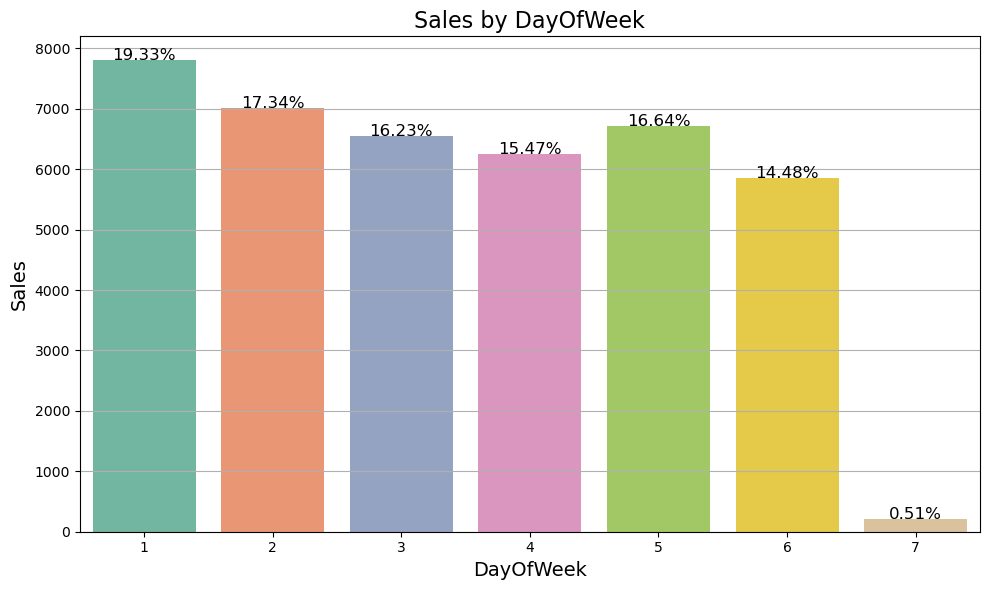

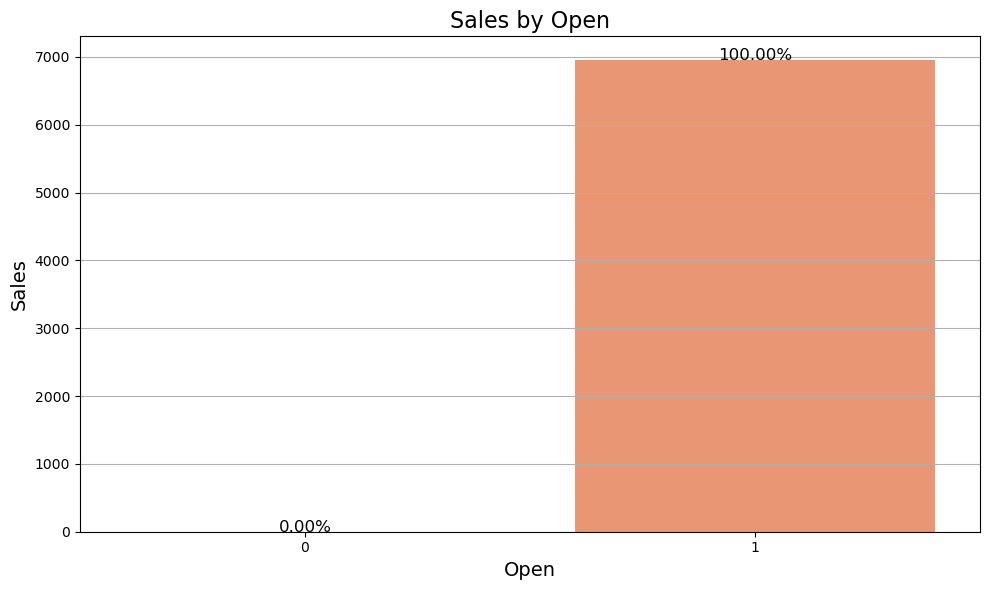

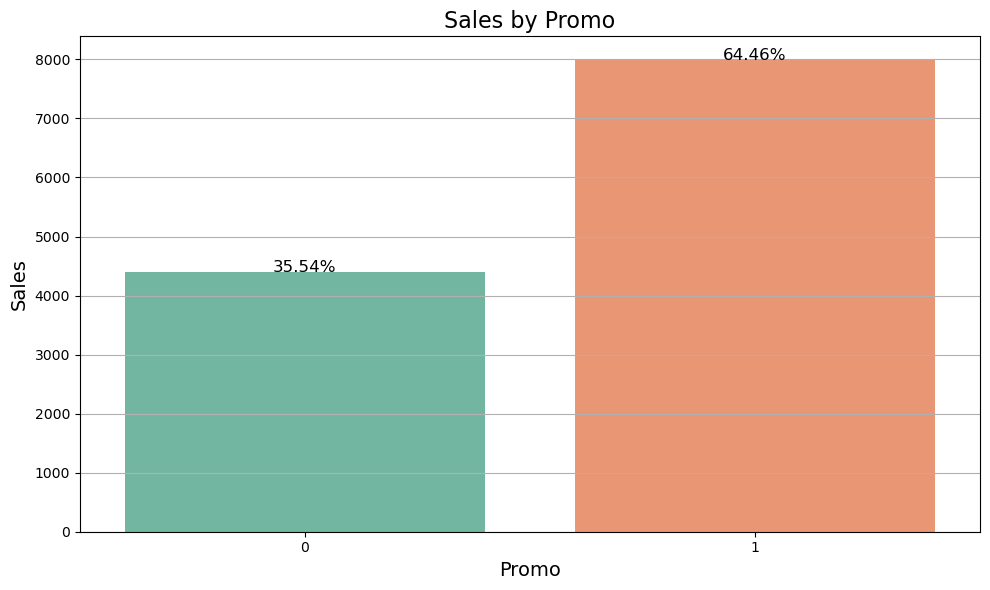

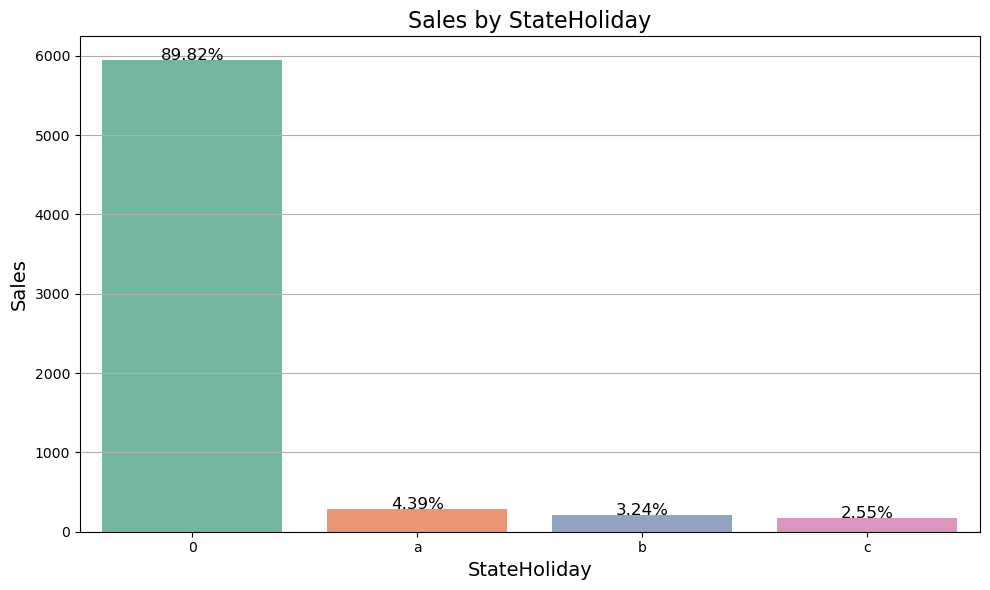

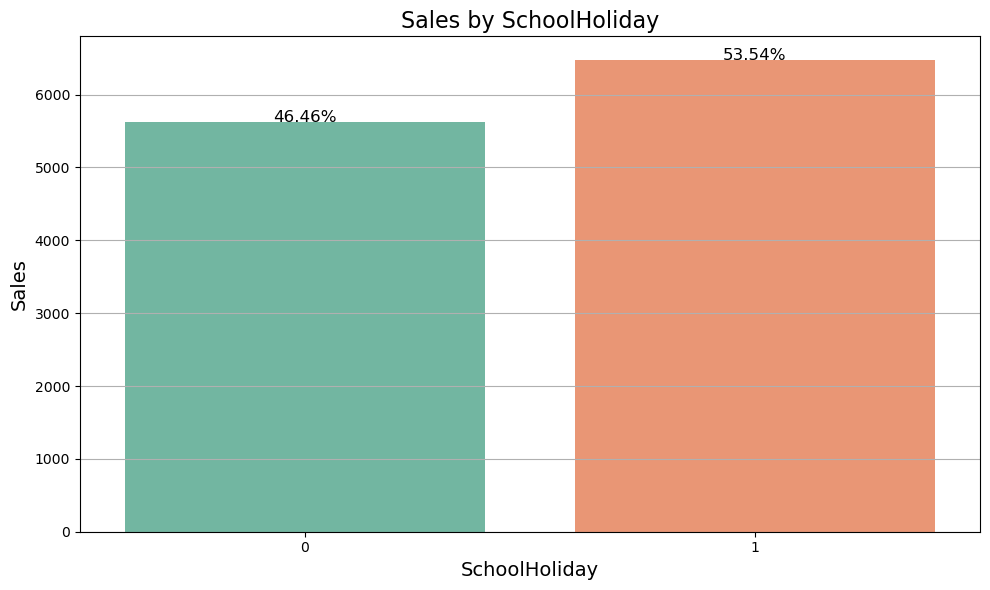

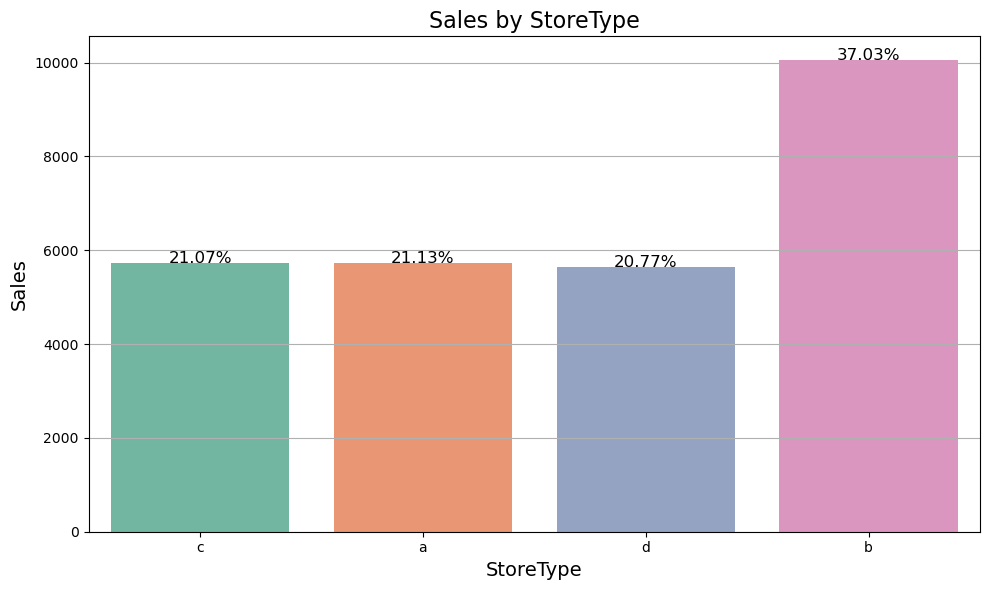

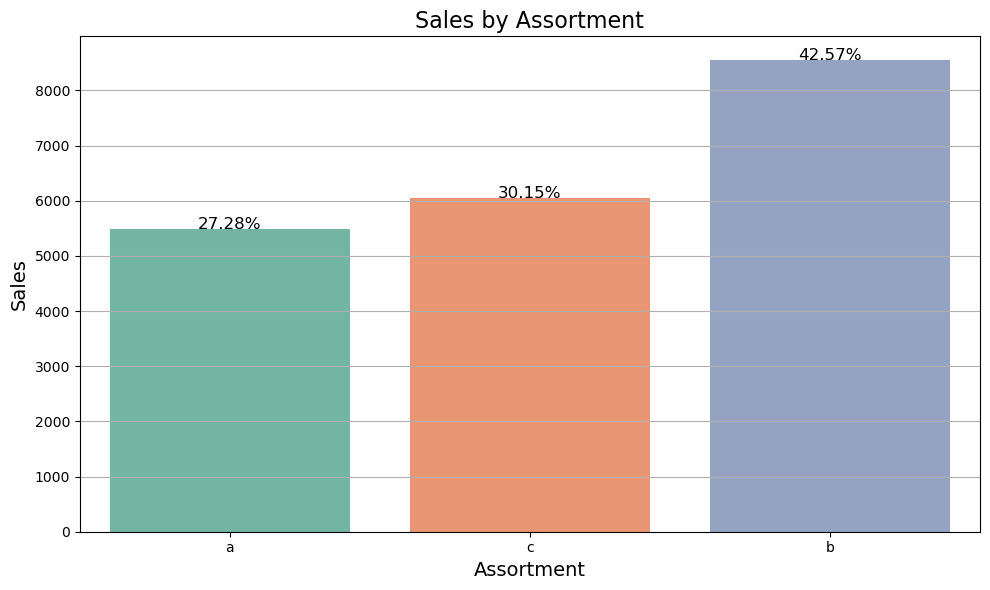

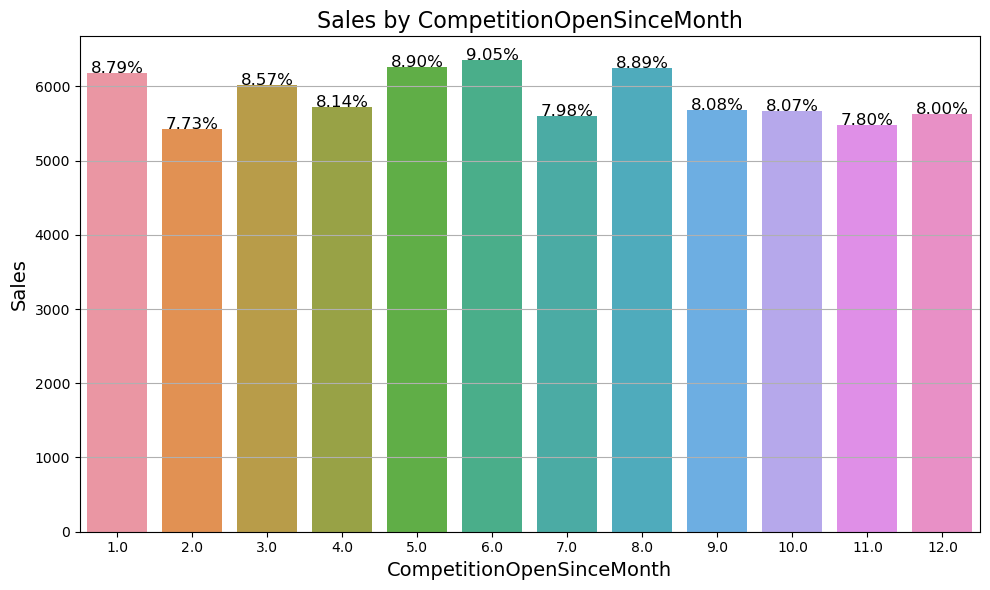

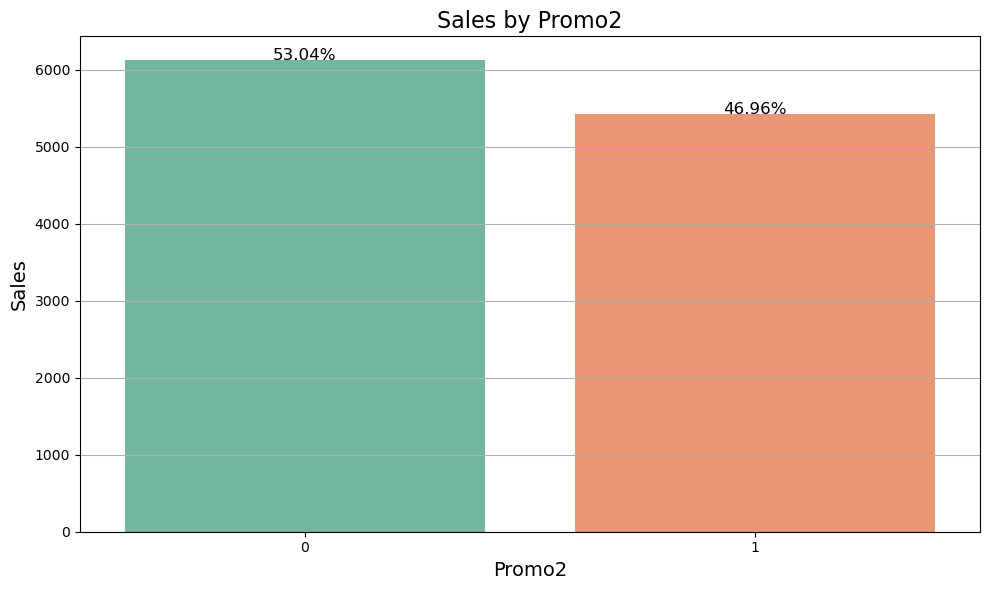

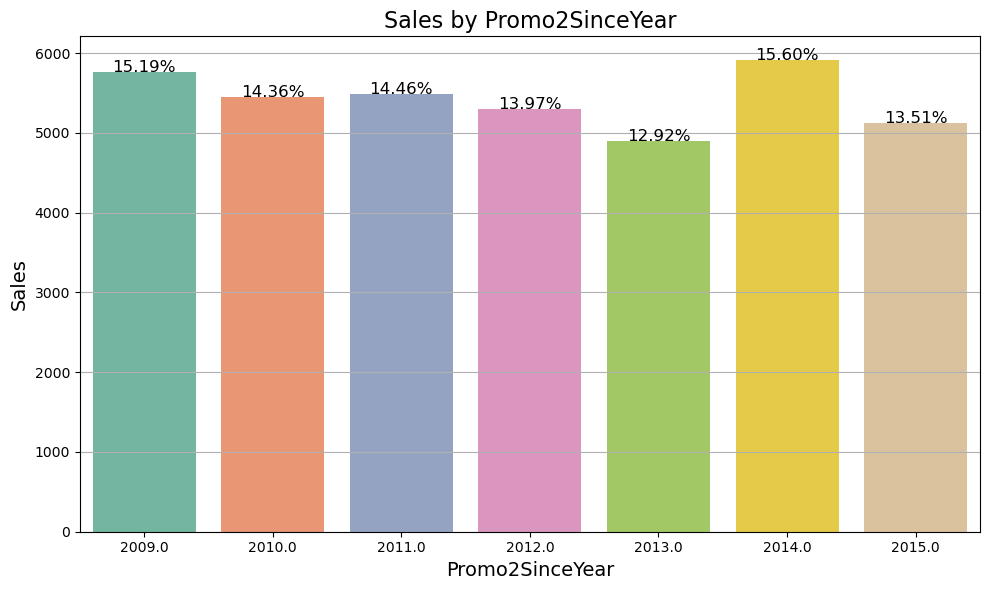

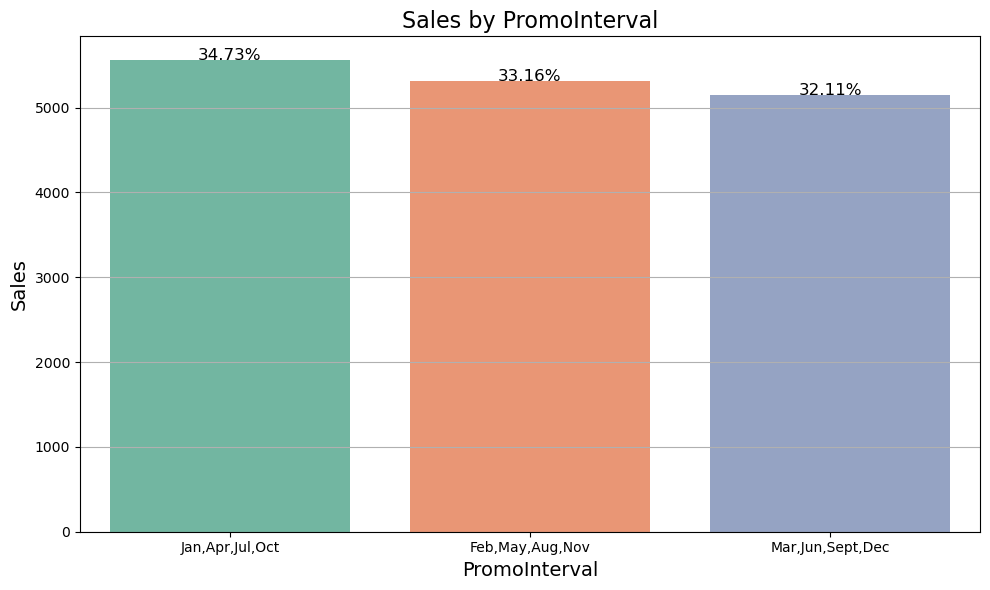

In [28]:
#code for barplots of the categorical variables against sales
#iterating over the categorical variables and plotting each of them

categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

# Set a color palette
sns.set_palette("Set2")

# Loop through each categorical variable
for value in categorical_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=merge_data[value], y=merge_data['Sales'], ci=None)  # ci=None removes error bars for cleaner look
    
    # Calculate the total height for each patch
    totals = [i.get_height() for i in ax.patches]
    total = sum(totals)

    # Annotate each bar with the percentage
    for i in ax.patches:
        height = i.get_height()
        percentage = (height / total) * 100
        ax.text(i.get_x() + i.get_width() / 2., height + 0.05, f'{percentage:.2f}%', ha='center', fontsize=12, color='black')
    
    # Adding title and labels
    ax.set_title(f'Sales by {value}', fontsize=16)
    ax.set_xlabel(value, fontsize=14)
    ax.set_ylabel('Sales', fontsize=14)
    
    # Adding grid for better readability
    ax.yaxis.grid(True)
    
    plt.tight_layout()
    plt.show()

#### Observation:
*  There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
* On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

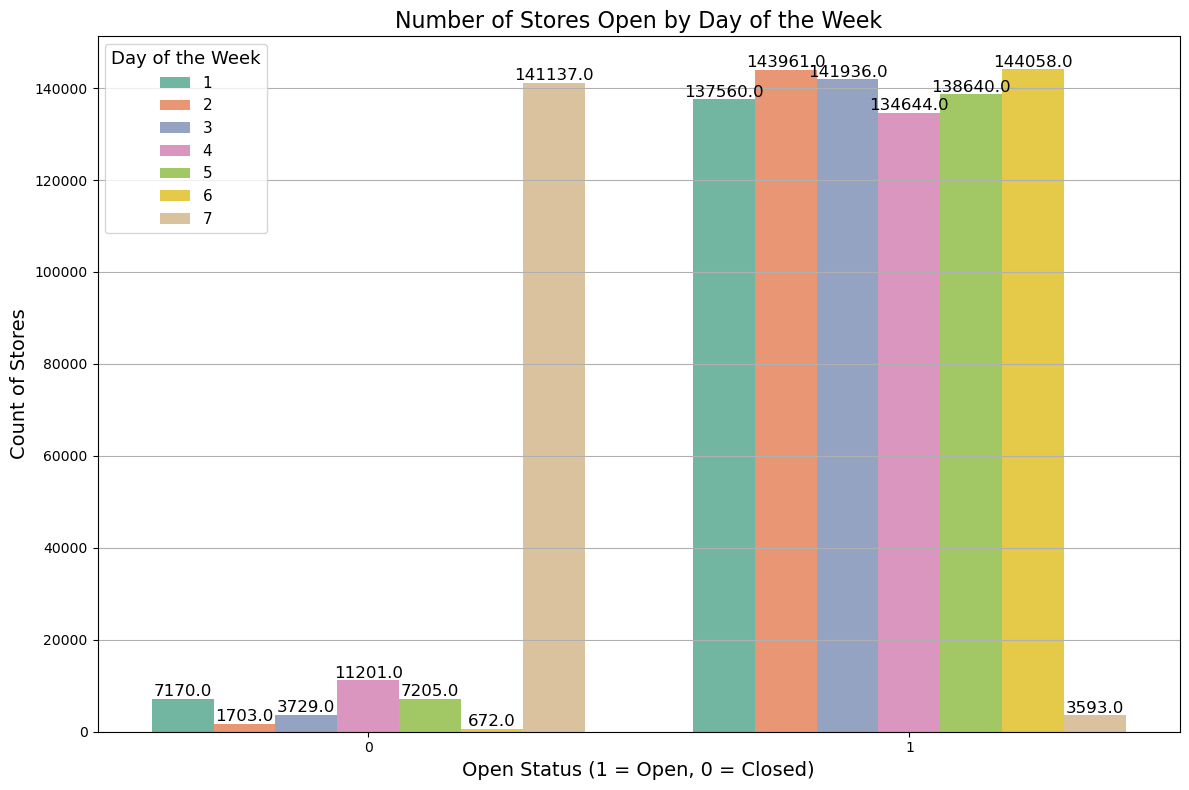

In [29]:
# Lets see how many shops are open on which days, and this gives a counts of stores closed for refurbishment 
# and suggests that most stores are closed on sunday.

# Set a color palette
sns.set_palette("Set2")

# Create the count plot
plt.figure(figsize=(12, 8))
ax = sns.countplot(x=merge_data["Open"], hue=merge_data["DayOfWeek"])

# Adding title and labels
ax.set_title('Number of Stores Open by Day of the Week', fontsize=16)
ax.set_xlabel('Open Status (1 = Open, 0 = Closed)', fontsize=14)
ax.set_ylabel('Count of Stores', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adjust the legend
plt.legend(title='Day of the Week', title_fontsize='13', fontsize='11', loc='upper left')

# Adding annotations
for p in ax.patches:
    count = p.get_height()
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

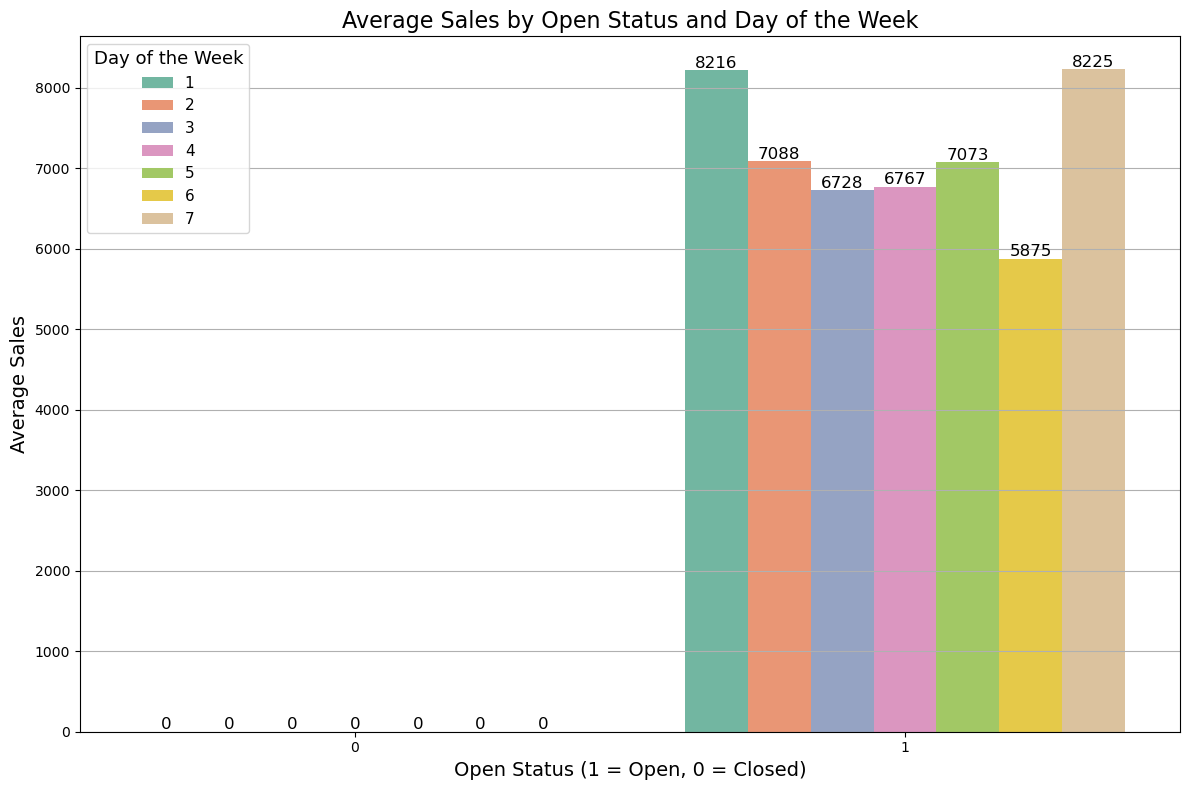

In [30]:
# open and close storetype relationship
# this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=merge_data["Open"], y=merge_data['Sales'], hue=merge_data["DayOfWeek"], ci=None)

# Adding title and labels
ax.set_title('Average Sales by Open Status and Day of the Week', fontsize=16)
ax.set_xlabel('Open Status (1 = Open, 0 = Closed)', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Adjust the legend
plt.legend(title='Day of the Week', title_fontsize='13', fontsize='11', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

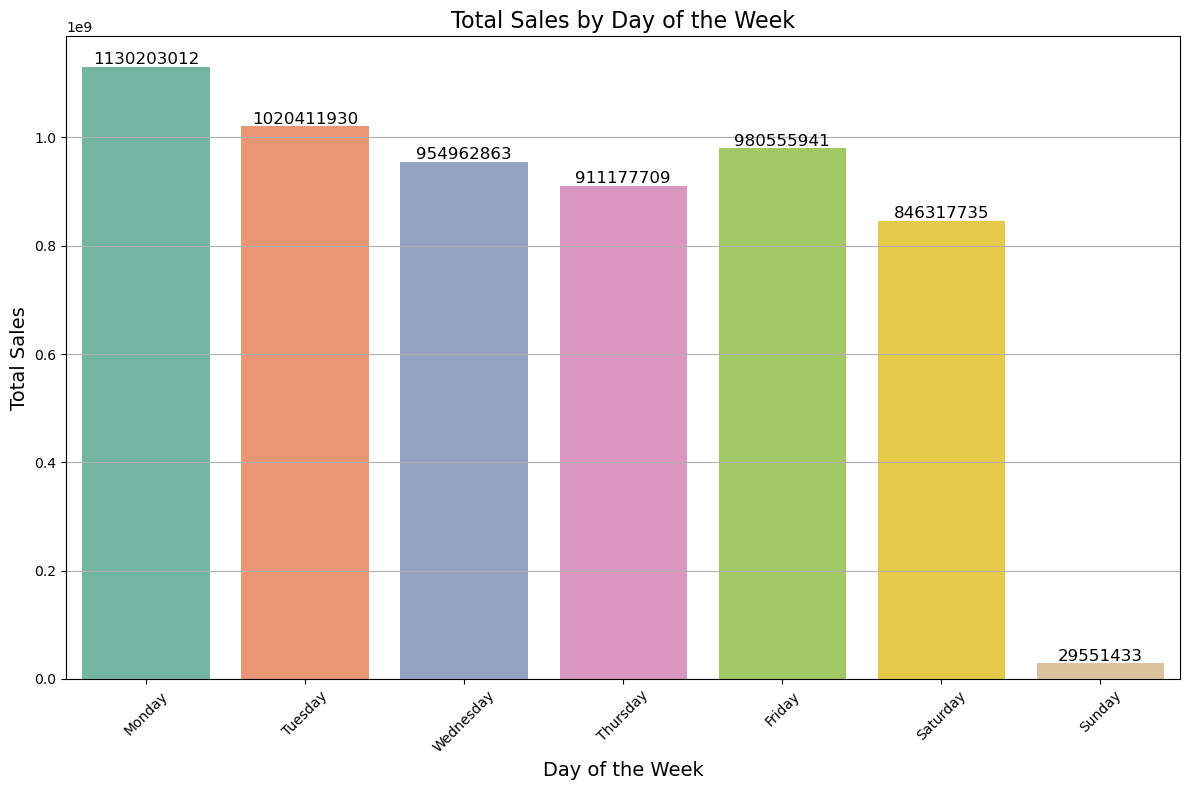

In [31]:
# Aggregate total sales by day of the week
total_sales_by_day = merge_data.groupby('DayOfWeek')['Sales'].sum().reset_index()

# Mapping days of the week to their names
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
total_sales_by_day['DayOfWeek'] = total_sales_by_day['DayOfWeek'].map(day_mapping)

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=total_sales_by_day["DayOfWeek"], y=total_sales_by_day['Sales'], ci=None)

# Adding title and labels
ax.set_title('Total Sales by Day of the Week', fontsize=16)
ax.set_xlabel('Day of the Week', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays. 

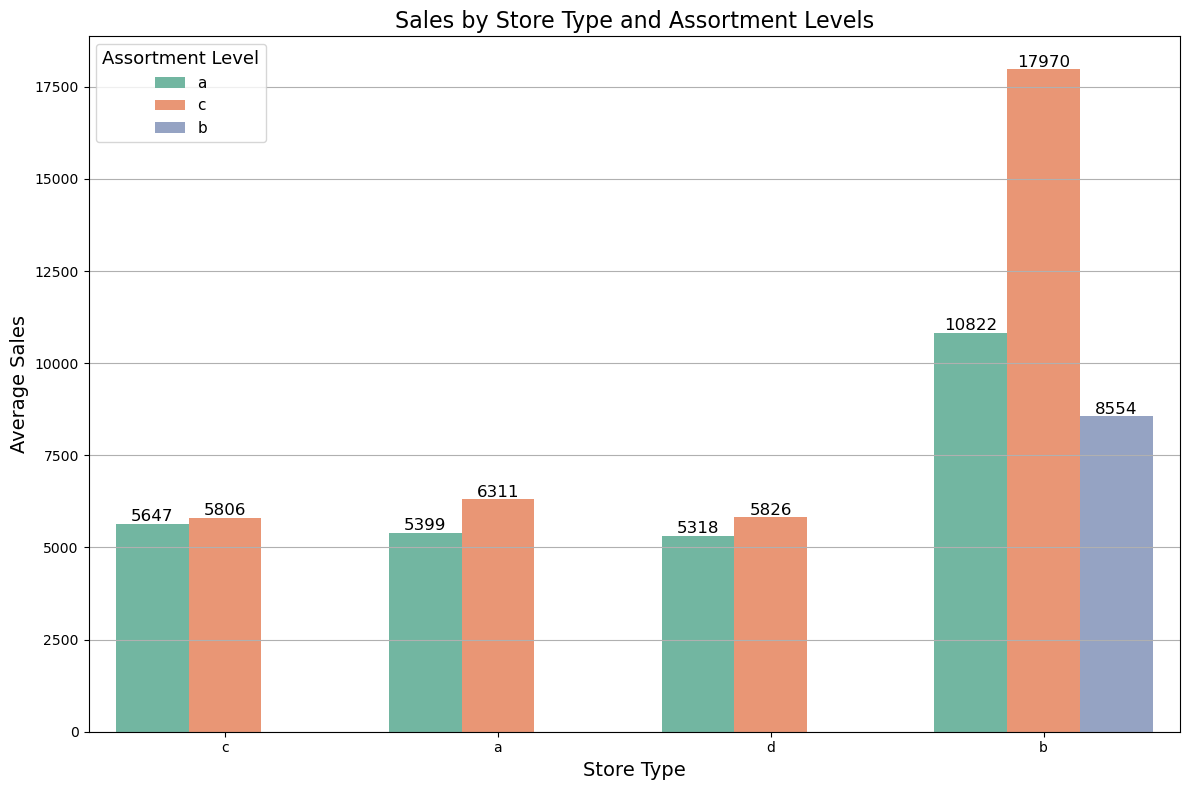

In [32]:
#Let's check the relationship between store type, assortment levels and sales

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=merge_data["StoreType"], y=merge_data['Sales'], hue=merge_data["Assortment"], ci=None)

# Adding title and labels
ax.set_title('Sales by Store Type and Assortment Levels', fontsize=16)
ax.set_xlabel('Store Type', fontsize=14)
ax.set_ylabel('Average Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Adjust the legend
plt.legend(title='Assortment Level', title_fontsize='13', fontsize='11', loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

In [33]:
#Store Type and Sales Exploration
store_type = merge_data.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True) # sorting into descending order to get higher values
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


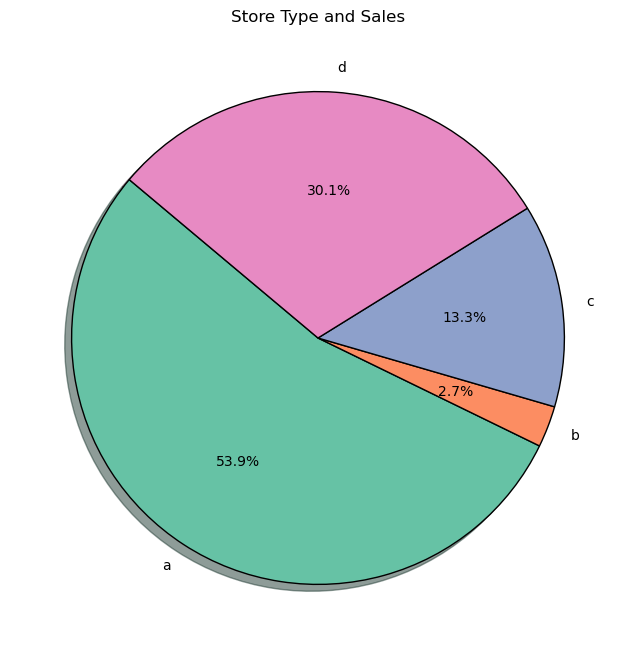

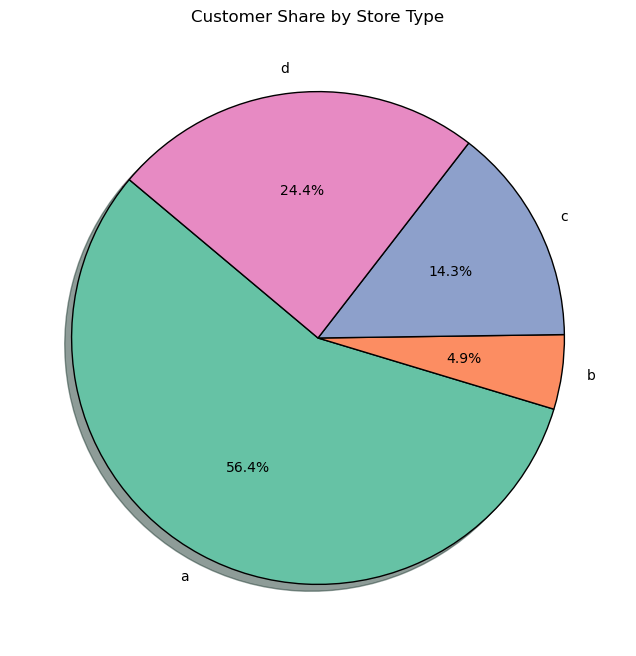

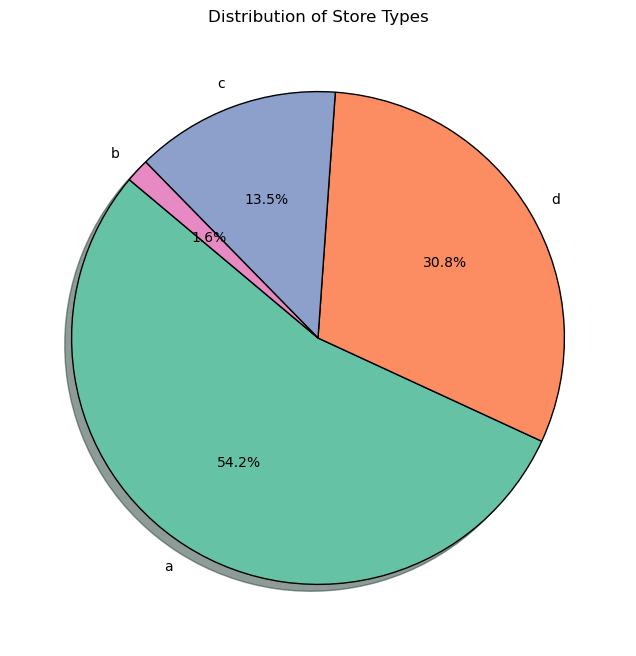

In [34]:
#let's explore store type a bit and it's influence on sales

# Set the figure size and color palette
plt.figure(figsize=(8, 8))
colors = sns.color_palette("Set2")

# Total sales by store type
merge_data.groupby("StoreType")["Sales"].sum().plot.pie(
    title='Store Type and Sales',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.ylabel('')  # Hide the y-label
plt.show()

# Total customers by store type
plt.figure(figsize=(8, 8))
merge_data.groupby("StoreType")["Customers"].sum().plot.pie(
    title='Customer Share by Store Type',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.ylabel('')  # Hide the y-label
plt.show()

# Store type distribution in the dataset
plt.figure(figsize=(8, 8))
merge_data["StoreType"].value_counts().plot.pie(
    title='Distribution of Store Types',
    autopct='%1.1f%%',
    shadow=True,
    colors=colors,
    startangle=140,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
plt.ylabel('')  # Hide the y-label
plt.show()

#### Observation:
* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean. 
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

### Continuous Features:

#### Sales with Time

In [35]:
years

array([2015, 2014, 2013], dtype=int64)

In [36]:
# Convert 'Date' column to datetime if it's not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(merge_data['Date']):
    merge_data['Date'] = pd.to_datetime(merge_data['Date'])

# Create 'Year' column from 'Date' column
merge_data['Year'] = merge_data['Date'].dt.year

# Filter data for each year
sales_data_2013 = merge_data[merge_data['Year'] == 2013]
sales_data_2014 = merge_data[merge_data['Year'] == 2014]
sales_data_2015 = merge_data[merge_data['Year'] == 2015]

# Print the first few rows of each year's data to confirm the filtering
print("Sales Data 2013:")
sales_data_2013.head()

Sales Data 2013:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
610235,1,2,2013-12-31,2362,298,1,0,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2013,12,1,365
610236,2,2,2013-12-31,2148,268,1,0,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2013,12,1,365
610237,3,2,2013-12-31,4081,463,1,0,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2013,12,1,365
610238,4,2,2013-12-31,9813,1323,1,0,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2013,12,1,365
610239,5,2,2013-12-31,2009,241,1,0,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2013,12,1,365


In [37]:
print("Sales Data 2014:")
sales_data_2014.head()

Sales Data 2014:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
236380,1,3,2014-12-31,2605,327,1,0,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2014,12,1,365
236381,2,3,2014-12-31,2269,252,1,0,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2014,12,1,365
236382,3,3,2014-12-31,3804,408,1,0,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2014,12,1,365
236383,4,3,2014-12-31,10152,1311,1,0,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2014,12,1,365
236384,5,3,2014-12-31,1830,217,1,0,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2014,12,1,365


In [38]:
print("Sales Data 2015:")
sales_data_2015.head()

Sales Data 2015:


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,212


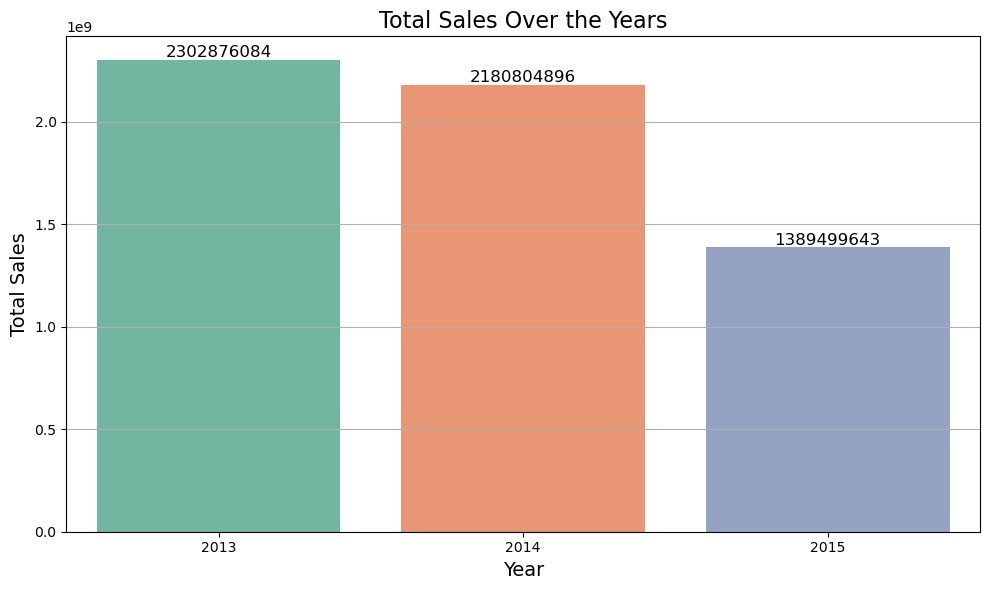

In [39]:
# Aggregate sales by year
sales_by_year = merge_data.groupby('Year')['Sales'].sum().reset_index()

# Set a color palette
sns.set_palette("Set2")

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sales_by_year["Year"], y=sales_by_year['Sales'], ci=None)

# Adding title and labels
ax.set_title('Total Sales Over the Years', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Sales', fontsize=14)

# Adding grid for better readability
ax.yaxis.grid(True)

# Adding counts on the individual bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12, color='black')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
#monthly sales
sales_2013 = sales_data_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_data_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_data_2015.groupby('Month')['Sales'].sum().reset_index()

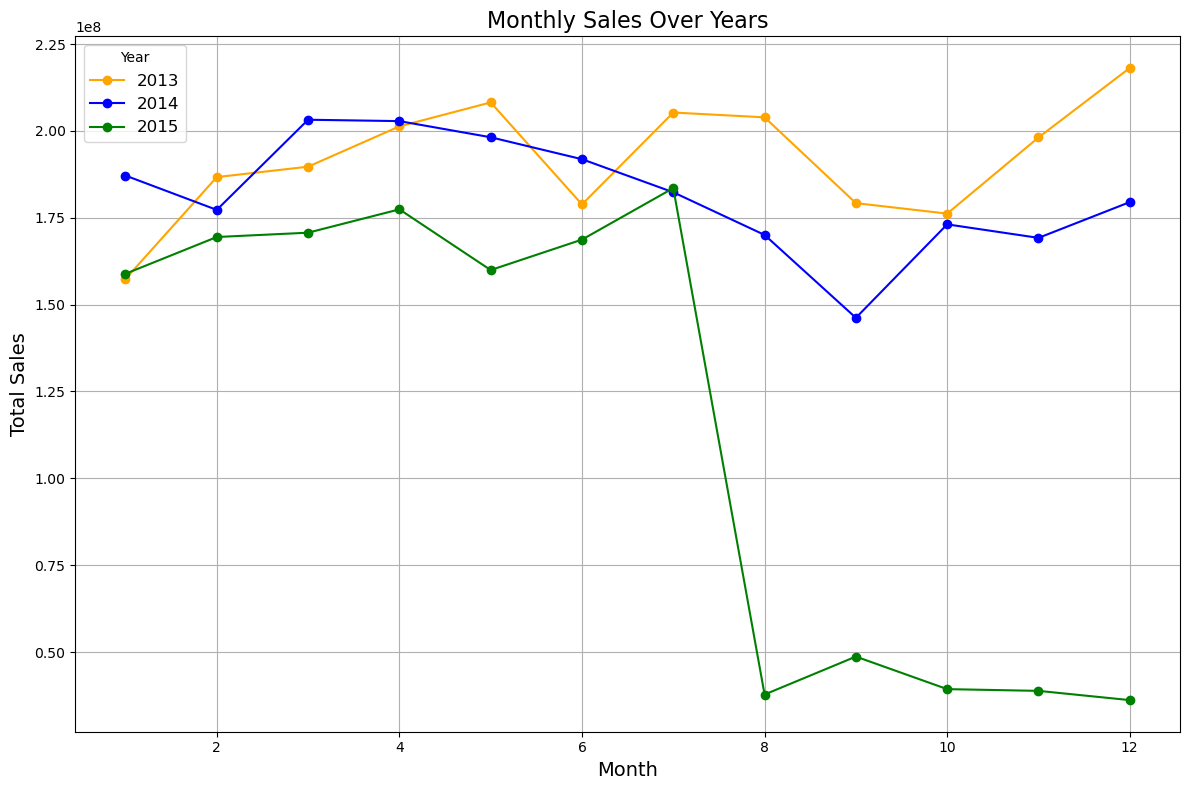

In [41]:
# Convert 'Date' column to datetime if it's not already in datetime format
if not pd.api.types.is_datetime64_any_dtype(merge_data['Date']):
    merge_data['Date'] = pd.to_datetime(merge_data['Date'])

# Create 'Year' and 'Month' columns from 'Date' column
merge_data['Year'] = merge_data['Date'].dt.year
merge_data['Month'] = merge_data['Date'].dt.month

# Filter data for each year
sales_data_2013 = merge_data[merge_data['Year'] == 2013]
sales_data_2014 = merge_data[merge_data['Year'] == 2014]
sales_data_2015 = merge_data[merge_data['Year'] == 2015]

# Aggregate sales by month for each year
monthly_sales_2013 = sales_data_2013.groupby('Month')['Sales'].sum()
monthly_sales_2014 = sales_data_2014.groupby('Month')['Sales'].sum()
monthly_sales_2015 = sales_data_2015.groupby('Month')['Sales'].sum()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales_2013.index, monthly_sales_2013.values, label='2013', color='orange', marker='o')
plt.plot(monthly_sales_2014.index, monthly_sales_2014.values, label='2014', color='blue', marker='o')
plt.plot(monthly_sales_2015.index, monthly_sales_2015.values, label='2015', color='green', marker='o')

# Adding title and labels
plt.title('Monthly Sales Over Years', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Adding legend
plt.legend(title='Year', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

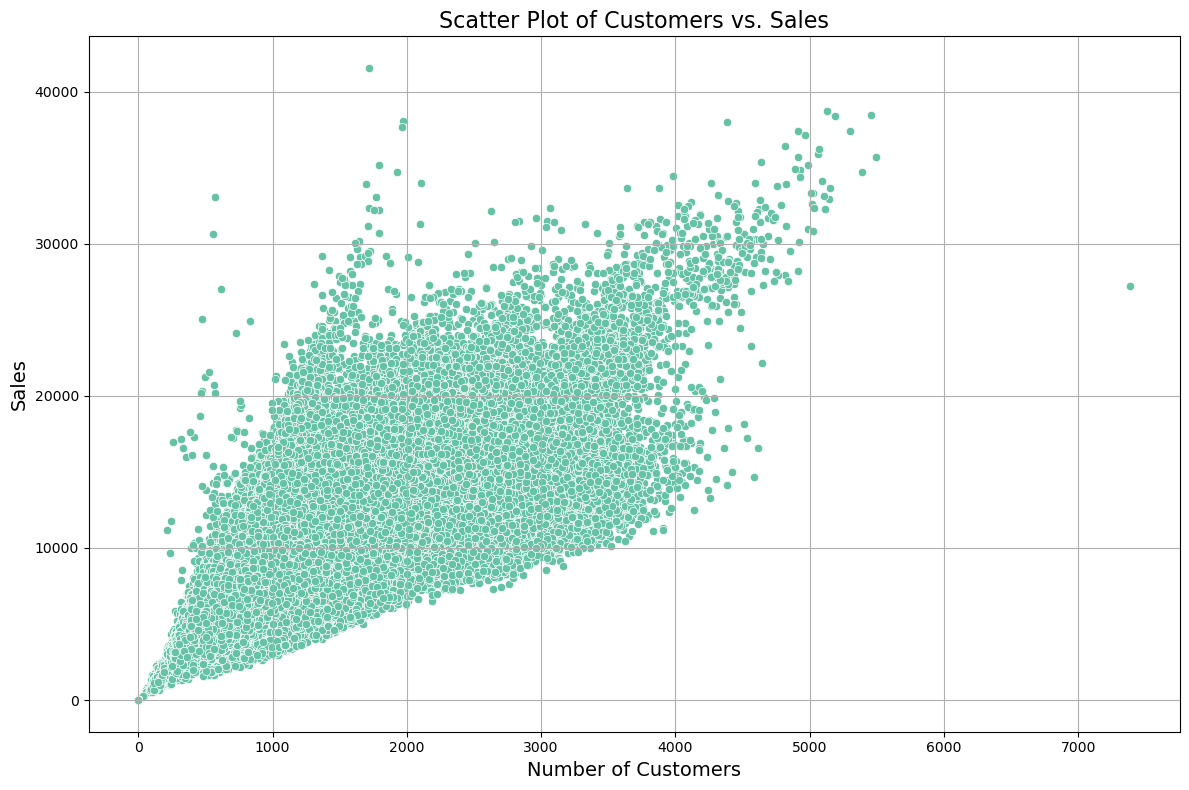

In [42]:
#scatterplot of Customers and Sales

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=merge_data['Customers'], y=merge_data['Sales'])

# Adding title and labels
plt.title('Scatter Plot of Customers vs. Sales', fontsize=16)
plt.xlabel('Number of Customers', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.

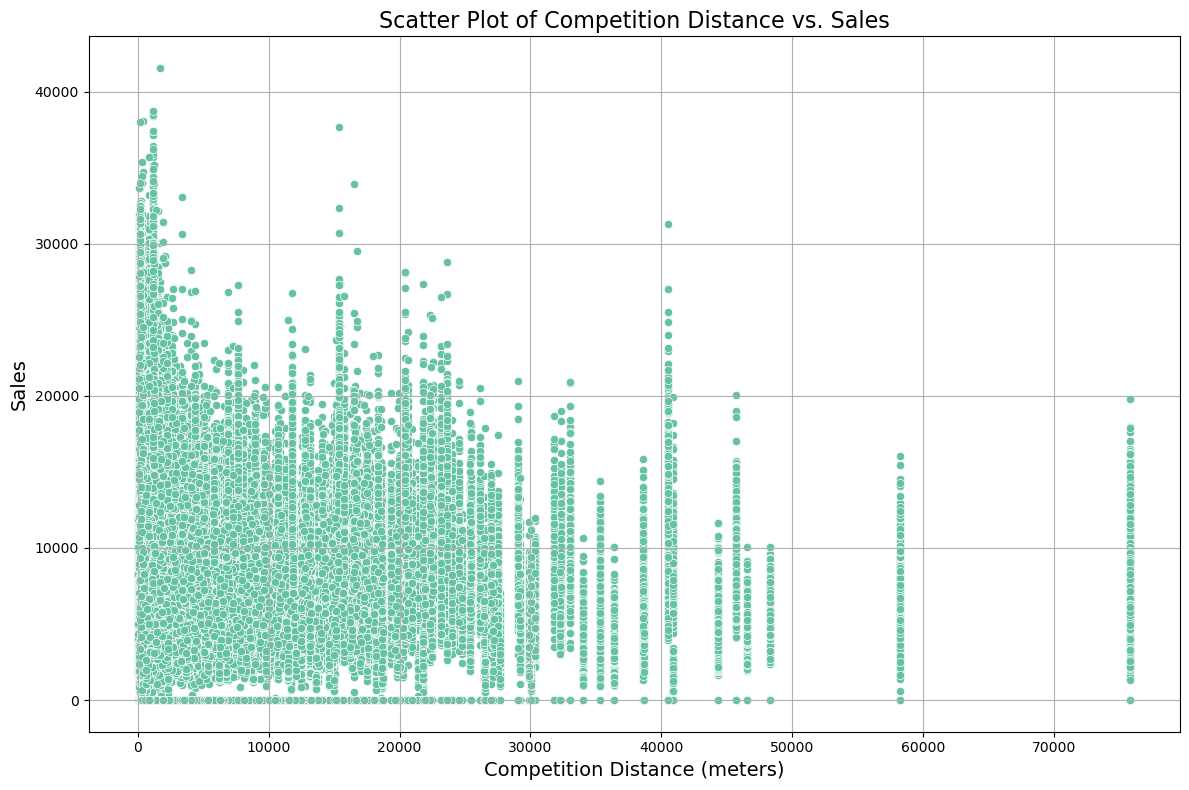

In [43]:
#scatterplot of Competition Distance and Sales

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x=merge_data['CompetitionDistance'], y=merge_data['Sales'])

# Adding title and labels
plt.title('Scatter Plot of Competition Distance vs. Sales', fontsize=16)
plt.xlabel('Competition Distance (meters)', fontsize=14)
plt.ylabel('Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

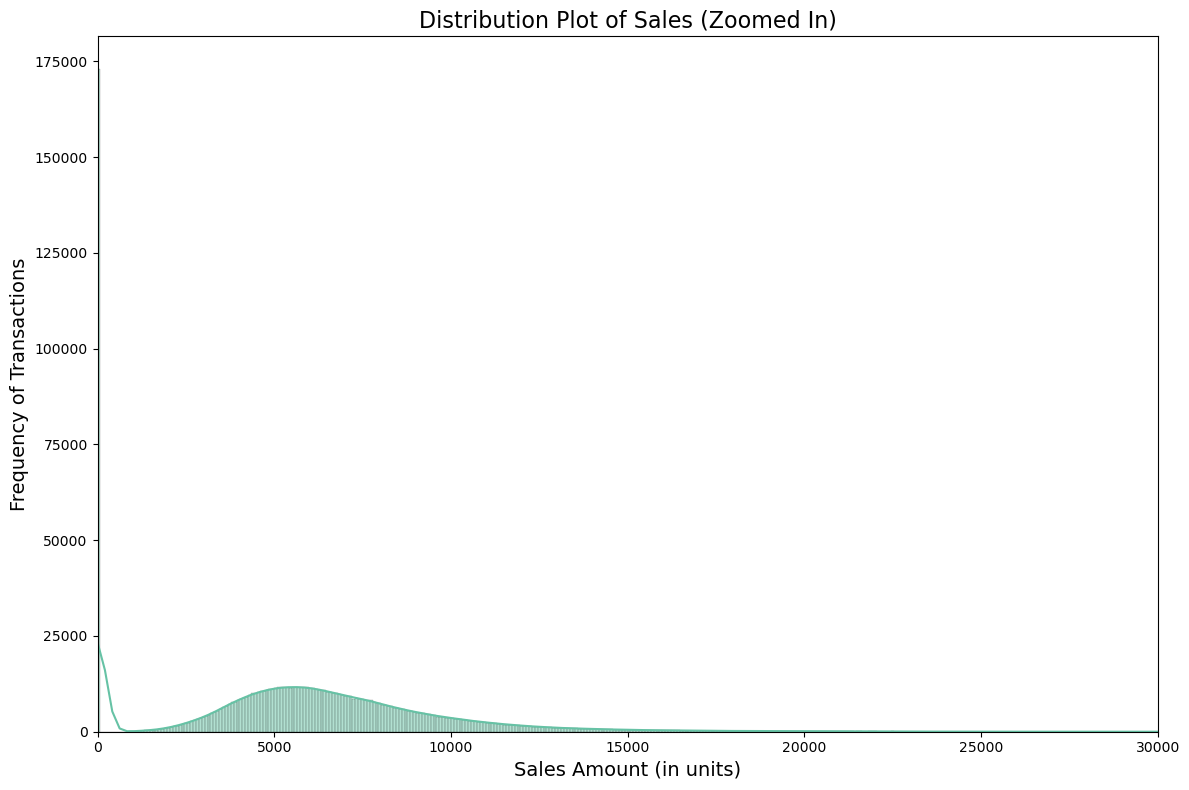

In [44]:
#distribution plot of Sales, as expected positively skewed

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the distribution plot and limit the x-axis range
sns.histplot(merge_data['Sales'], kde=True)
plt.xlim(0, 30000)

# Adding title and labels
plt.title('Distribution Plot of Sales (Zoomed In)', fontsize=16)
plt.xlabel('Sales Amount (in units)', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

### Correlation Matrix
Correlation is a statistical term used to measure the degree in which two variables move in relation to each other. A perfect positive correlation means that the correlation coefficient is exactly 1. This implies that as one variable moves, either up or down, the other moves in the same direction. A perfect negative correlation means that two variables move in opposite directions, while a zero correlation implies no linear relationship at all.

By checking the correlation the factors affecting sales can be figured out.

In [45]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture

# Drop unnecessary columns
columns_to_drop = ['Store', 'Year']
corr_df = merge_data.drop(columns=columns_to_drop, axis=1)

# Replace categorical values with numeric values
corr_df['StateHoliday'].replace({'a': 1, 'b': 1, 'c': 1, '0': 0}, inplace=True)

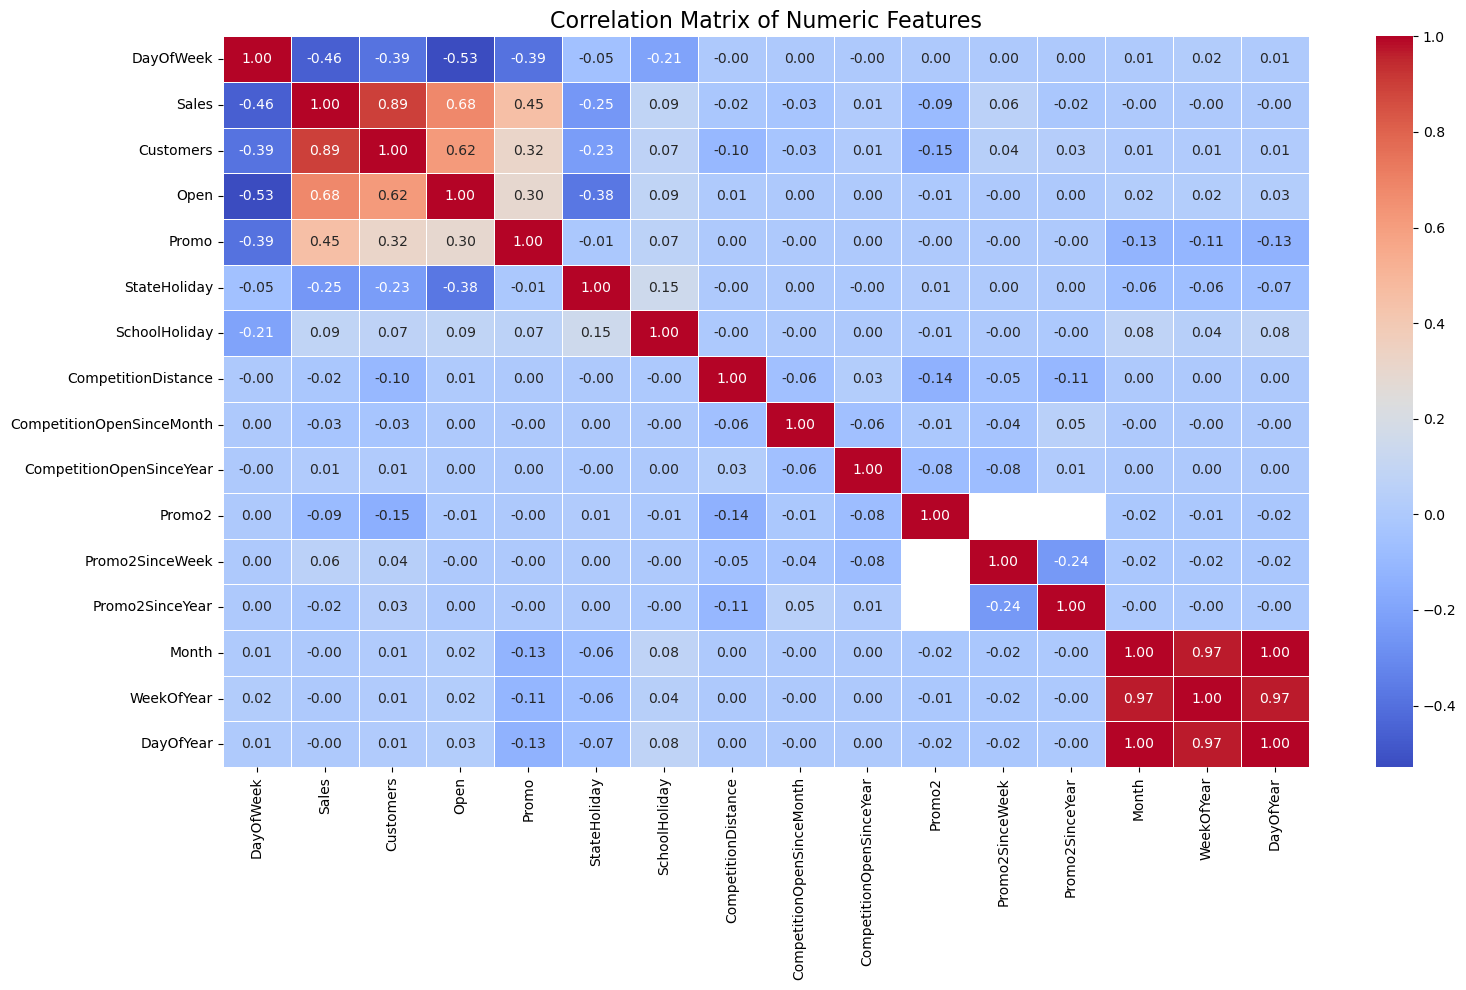

In [46]:
#correlation heatmap

# Set the figure size
plt.figure(figsize=(16, 10))

# Create the heatmap for the correlation matrix
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=0.5)

# Adding title
plt.title('Correlation Matrix of Numeric Features', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

#### Observation:
* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

### EDA Conclusions and Hypotheses Validation:
* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature. 

* The positive effect of promotion on Customers and Sales is observable. 
* It is clear that most of the stores remain closed during State and School Holidays. 
But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.
* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others. 

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.
The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

### <a id='top'></a> <a id="title-three"></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Data Manipulation and Feature Selection</center></h1>
    
#### Data manipulation involves manipulating and changing our dataset before feeding it to various machine learning models. This involves keeping important features, outlier treatment, feature scaling and creating dummy variables if necessary.

### Feature Engineering

In [47]:
# no of observations for closed stores with 0 sales

(merge_data[merge_data.Open == 0]).shape

(172817, 22)

#### It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. This was also indicated in the barplot of Open vs Sales. 

In [48]:
#since the stores closed had 0 sale value; removing the irrelevant part

df1 = merge_data[merge_data.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [49]:
# verification

df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,0,1,a,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,0,1,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,0,1,a,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,212


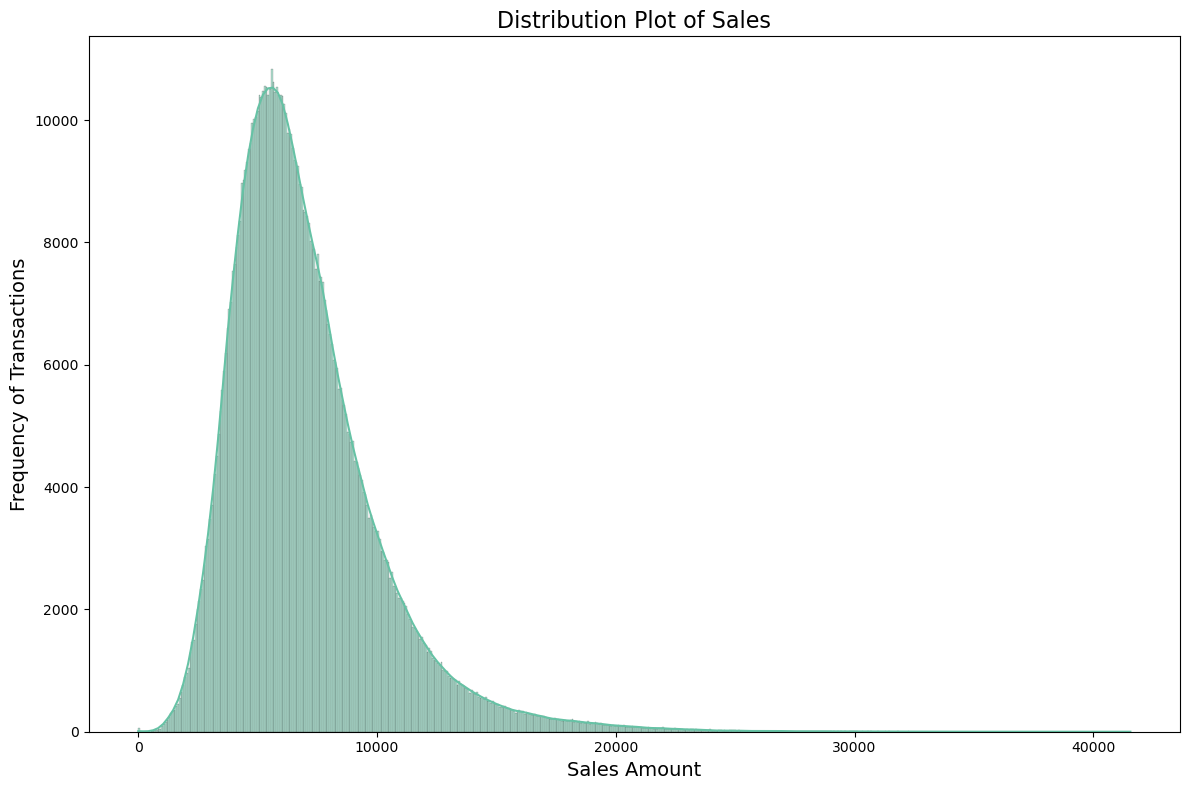

In [50]:
#distribution plot of Sales, as expected positively skewed

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the distribution plot using histplot
sns.histplot(df1['Sales'], kde=True)

# Adding title and labels
plt.title('Distribution Plot of Sales', fontsize=16)
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [51]:
## transformation
df1['Sales'] = np.log(df1['Sales'])

In [52]:
df1.dropna(inplace=True)

In [53]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

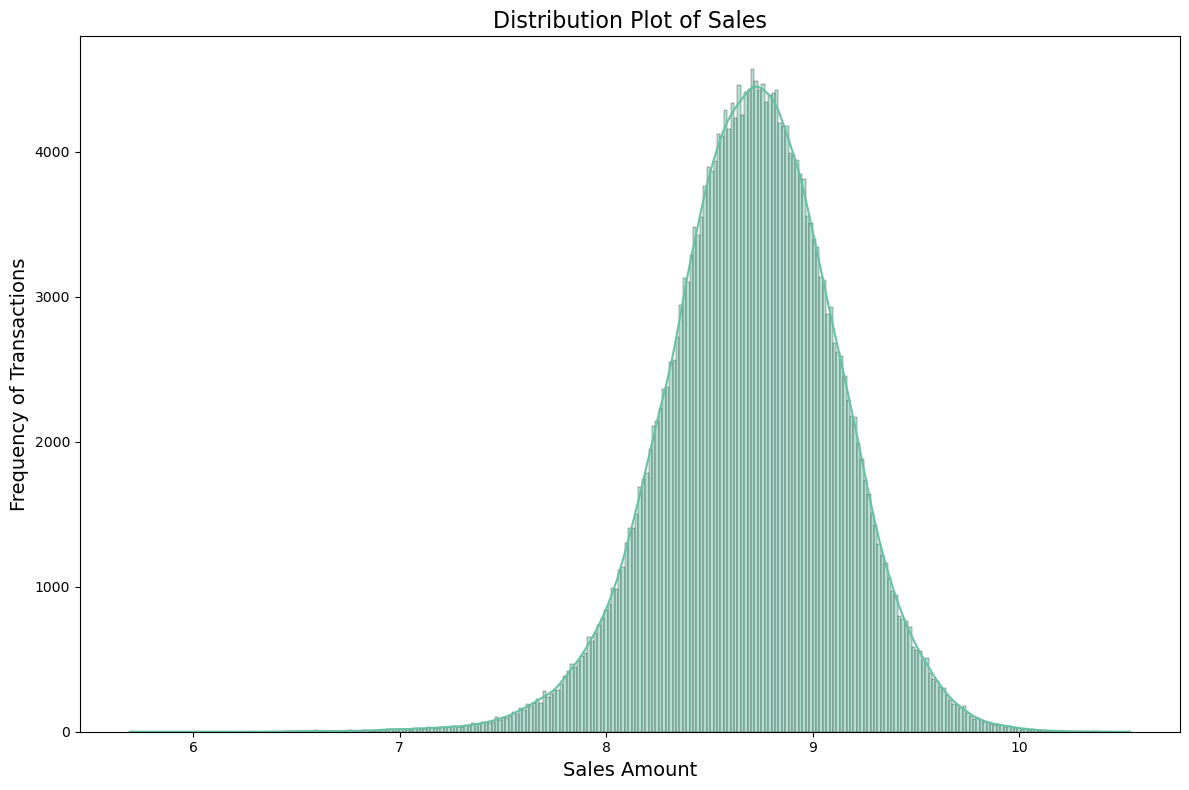

In [54]:
#distribution plot of Sales

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the distribution plot using histplot
sns.histplot(df1['Sales'], kde=True)

# Adding title and labels
plt.title('Distribution Plot of Sales', fontsize=16)
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency of Transactions', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [55]:
#changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [56]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [57]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months

# Ensure 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract Year, Month, and WeekOfYear from 'Date'
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['WeekOfYear'] = df1['Date'].dt.isocalendar().week

# Calculate Promo2Open
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear']) * 12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek']) * 0.230137

# Correct negative values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x: 0 if x < 0 else x) * df1['Promo2']

# Create a function to check if Promo2 was running in the sale month
def promo2running(row):
    month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
    try:
        months = row['PromoInterval'].split(',')
        if month_dict[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

# Apply the function
df1['Promo2running'] = df1.apply(promo2running, axis=1) * df1['Promo2']

# Drop unnecessary columns
df1.drop(['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval'], axis=1, inplace=True)

# Display the first few rows of the updated DataFrame
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
1,2,5,2015-07-31,8.710125,625,1,0,1,a,a,570.0,1,2015,7,31,212,92.0,64.142466,1
2,3,5,2015-07-31,9.025696,821,1,0,1,a,a,14130.0,1,2015,7,31,212,103.0,51.912329,1
10,11,5,2015-07-31,9.255027,1236,1,0,1,a,c,960.0,1,2015,7,31,212,44.0,42.904110,1
13,14,5,2015-07-31,8.786304,710,1,0,1,a,a,1300.0,1,2015,7,31,212,16.0,45.928767,1
14,15,5,2015-07-31,9.125980,766,1,0,1,d,c,4110.0,1,2015,7,31,212,64.0,51.912329,1


In [58]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [59]:
df1.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-02 2              5  8.421783        554      0             0   
           3              5  8.813587        806      0             0   
           11             5  9.135725       1297      0             0   
           14             5  8.699181        687      0             0   
           15             5  8.799511        678      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-02 2                  0         a          a                570.0   
           3                  0         a          a              14130.0   
           11                 0         a          c                960.0   
           14                 0         a          a               1300.0   
           15                 0         d          c               4110.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-02 2           1  2013      1           1          2             62.0   
           3           1  2013      1           1          2             73.0   
           11          1  2013      1           1          2             14.0   
           14          1  2013      1           1          2              0.0   
           15          1  2013      1           1          2             34.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-02 2       33.238356              1  
           3       21.008219              1  
           11      12.000000              1  
           14      15.024657              1  
           15      21.008219              1

### Outlier Detection

#### Outliers and Z score:
In statistics, an outlier is a data point that differs significantly from other observations. Outliers can occur by chance in any distribution, but they often indicate either measurement error or that the population has a heavy-tailed distribution.

Z-score is a statistical measure that tells you how far is a data point from the rest of the dataset. In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean.

z = (x-mean)/standard deviation

Total number of Outliers present in the Sales column are 295.


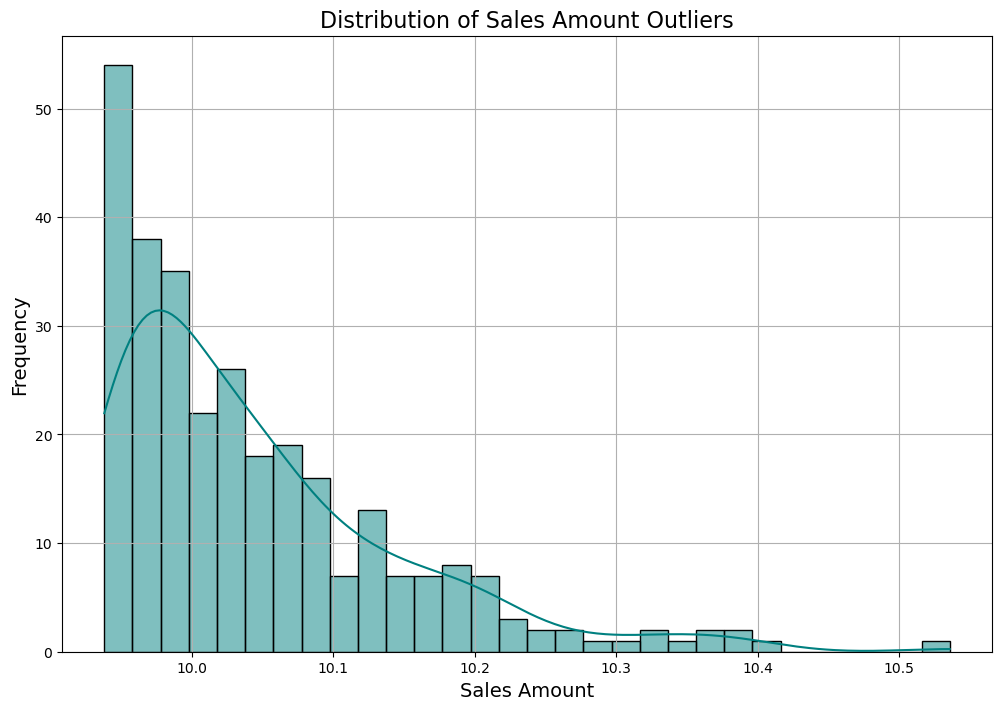

In [60]:
#code to seperate outliers
# Calculate mean and standard deviation of Sales
mean_sales = np.mean(df1['Sales'])
sd_sales = np.std(df1['Sales'])

# Define the threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = []
for value in df1['Sales']:
    z_score = (value - mean_sales) / sd_sales
    if z_score > threshold:
        outliers.append(value)

# Total number of outliers
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')

# Plotting the outlier distribution
plt.figure(figsize=(12, 8))
sns.histplot(outliers, kde=True, color='teal', bins=30, edgecolor='black').set(title='Outliers Distribution')
plt.xlabel('Sales Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Sales Amount Outliers', fontsize=16)
plt.grid(True)
plt.show()

#### The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:

In [61]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.009335743199844653


In [62]:
#exploring the reasons behind this behaviour
sales_outliers.head()

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-02-12 261            1  10.214972       1542      1             0   
           544            1  10.258571       3095      1             0   
2013-09-27 126            5  10.205442        613      1             0   
2013-10-22 126            2  10.329376        554      1             0   
2013-10-24 126            4  10.406412        574      1             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-02-12 261                0         d          c              15340.0   
           544                0         a          a                250.0   
2013-09-27 126                0         d          a               3370.0   
2013-10-22 126                1         d          a               3370.0   
2013-10-24 126                1         d          a               3370.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-02-12 261         1  2013      2           7         43              0.0   
           544         1  2013      2           7         43            134.0   
2013-09-27 126         1  2013      9          39        270              0.0   
2013-10-22 126         1  2013     10          43        295              0.0   
2013-10-24 126         1  2013     10          43        297              0.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-02-12 261     40.635616              0  
           544     34.619178              0  
2013-09-27 126     28.832877              0  
2013-10-22 126     29.753425              0  
2013-10-24 126     29.753425              0

#### Observation:
Some interesting insights can be drawn from these outliers dataframe:
* First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B. 
* All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
* It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.


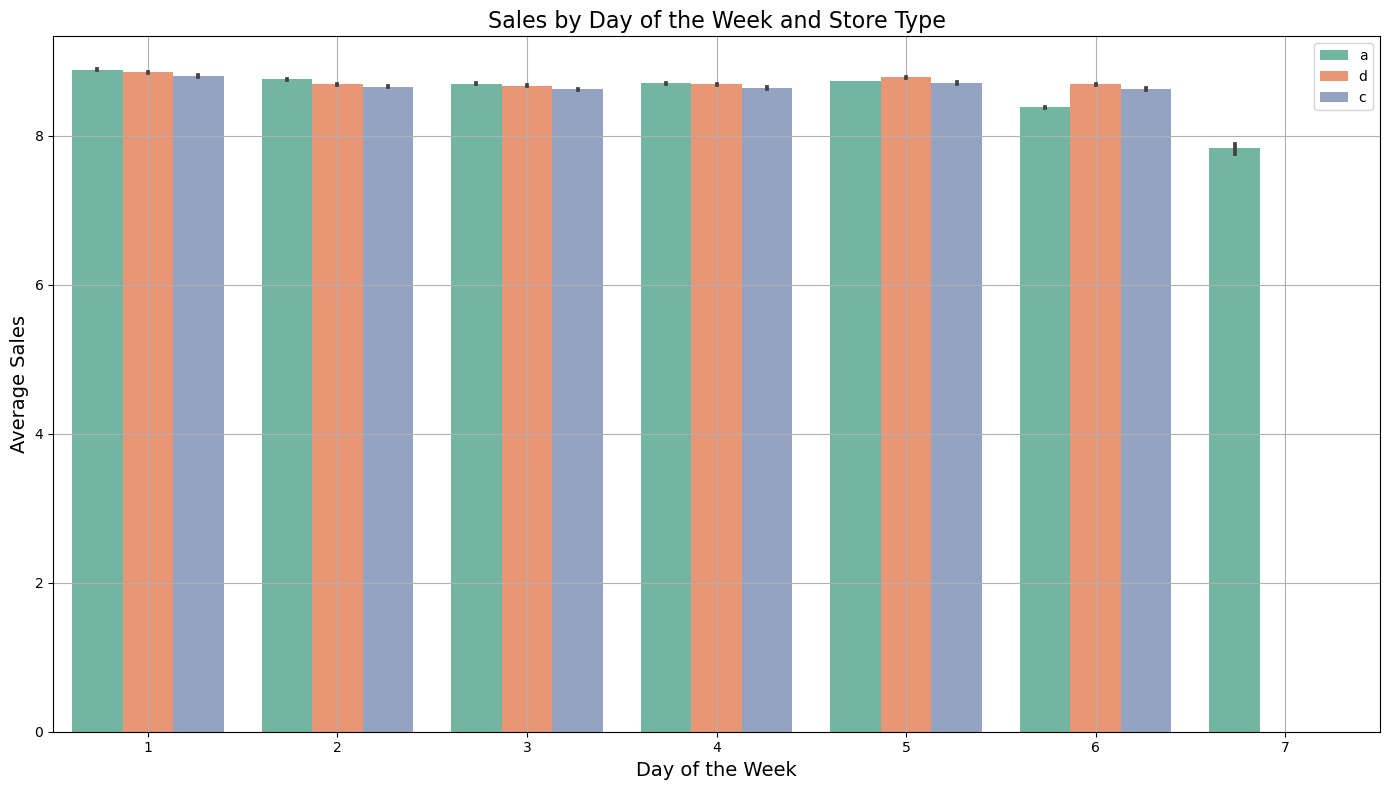

In [63]:
#let's explore store type and Day Of week

# Set the figure size
plt.figure(figsize=(14, 8))

# Create the bar plot
sns.barplot(x=df1['DayOfWeek'], y=df1['Sales'], hue=df1['StoreType'])

# Adding title and labels
plt.title('Sales by Day of the Week and Store Type', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

# Adding grid for better readability
plt.grid(True)
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

In [64]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,


#### Observation:
* This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
* Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

In [65]:
#shape
df1.shape

(267788, 17)

**Outlier Treatment**

- It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.
- The primary reasons for the behaviour are promotion and store type B.
- If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features. It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

In [66]:
#just in case something messes up
df2 = df1.copy()

In [67]:
df2.head()

DayOfWeek     Sales  Customers  Promo  StateHoliday  \
Date       Store                                                        
2013-01-02 2              5  8.421783        554      0             0   
           3              5  8.813587        806      0             0   
           11             5  9.135725       1297      0             0   
           14             5  8.699181        687      0             0   
           15             5  8.799511        678      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-02 2                  0         a          a                570.0   
           3                  0         a          a              14130.0   
           11                 0         a          c                960.0   
           14                 0         a          a               1300.0   
           15                 0         d          c               4110.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-02 2           1  2013      1           1          2             62.0   
           3           1  2013      1           1          2             73.0   
           11          1  2013      1           1          2             14.0   
           14          1  2013      1           1          2              0.0   
           15          1  2013      1           1          2             34.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-02 2       33.238356              1  
           3       21.008219              1  
           11      12.000000              1  
           14      15.024657              1  
           15      21.008219              1

In [68]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

In [69]:
#check
df2.head()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-02 2              5        554      0             0              0   
           3              5        806      0             0              0   
           11             5       1297      0             0              0   
           14             5        687      0             0              0   
           15             5        678      0             0              0   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-02 2             a          a                570.0       1  2013   
           3             a          a              14130.0       1  2013   
           11            a          c                960.0       1  2013   
           14            a          a               1300.0       1  2013   
           15            d          c               4110.0       1  2013   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2013-01-02 2          1           1          2             62.0   33.238356   
           3          1           1          2             73.0   21.008219   
           11         1           1          2             14.0   12.000000   
           14         1           1          2              0.0   15.024657   
           15         1           1          2             34.0   21.008219   

                  Promo2running     Sales  
Date       Store                           
2013-01-02 2                  1  8.421783  
           3                  1  8.813587  
           11                 1  9.135725  
           14                 1  8.699181  
           15                 1  8.799511

## <a id='top'></a> <a id="title-four"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Modeling</center></h1>
 
**Factors affecting in choosing the model:**
 
Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:
- A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as peak days, festive seasons etc which would most likely be considered as outliers in simple linear regression.
- Having X columns with 30% continuous and 70% categorical features. Business prefers the model to be interpretable in nature and decision based algorithms work better with categorical data.

### Train-Test Split

In [70]:
#start date
df2.head()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-02 2              5        554      0             0              0   
           3              5        806      0             0              0   
           11             5       1297      0             0              0   
           14             5        687      0             0              0   
           15             5        678      0             0              0   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-02 2             a          a                570.0       1  2013   
           3             a          a              14130.0       1  2013   
           11            a          c                960.0       1  2013   
           14            a          a               1300.0       1  2013   
           15            d          c               4110.0       1  2013   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2013-01-02 2          1           1          2             62.0   33.238356   
           3          1           1          2             73.0   21.008219   
           11         1           1          2             14.0   12.000000   
           14         1           1          2              0.0   15.024657   
           15         1           1          2             34.0   21.008219   

                  Promo2running     Sales  
Date       Store                           
2013-01-02 2                  1  8.421783  
           3                  1  8.813587  
           11                 1  9.135725  
           14                 1  8.699181  
           15                 1  8.799511

In [71]:
#end date
df2.tail()

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2015-12-06 1109           5        418      0             0              0   
           1111           5        370      0             0              0   
2015-12-07 209            7        283      0             0              0   
           931            7        370      0             0              0   
           1099           7        732      0             0              0   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2015-12-06 1109          c          a               3490.0       1  2015   
           1111          a          a               1900.0       1  2015   
2015-12-07 209           a          c              11680.0       1  2015   
           931           a          c               1480.0       1  2015   
           1099          a          c                200.0       1  2015   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2015-12-06 1109      12          49        340             56.0   42.213699   
           1111      12          49        340             18.0   28.142466   
2015-12-07 209       12          50        341             51.0   28.372603   
           931       12          50        341             51.0   47.276713   
           1099      12          50        341             32.0   32.284932   

                  Promo2running     Sales  
Date       Store                           
2015-12-06 1109               0  8.313852  
           1111               0  8.246434  
2015-12-07 209                0  7.819234  
           931                0  7.830426  
           1099               0  8.527737

In [72]:
# we won't need customers for sales forecasting
df2.drop('Customers',axis=1,inplace=True)

In [73]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [74]:
#csv
df_train1 = df_train.to_csv("df_train.csv")
df_test2 = df_test.to_csv("df_test.csv")

In [75]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (243704, 15)
The shape of y_train is: (243704, 1)
The shape of X_test is: (13503, 15)
The shape of y_test is: (13503, 1)


In [76]:
#importing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Prepare features and target variable
X = df1.drop(columns=['Sales'])
y = df1['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training data
encoder.fit(X_train[categorical_cols])

# Get the new feature names after encoding
encoded_features = encoder.get_feature_names_out(categorical_cols)

# Transform the categorical features in the training set
X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), columns=encoded_features, index=X_train.index)

# Transform the categorical features in the testing set
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoded_features, index=X_test.index)

# Concatenate the encoded features with the original DataFrame (excluding original categorical columns)
X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

# Display the first few rows of the updated training set
X_train.head()

,,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_c,StoreType_d,Assortment_a,Assortment_c
Date,Store,,,,,,,,,,,,,,,,,,,,,
2014-11-02,970,468,0,0,0,910.0,1,2014,11,44,306,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2013-05-21,65,490,0,0,0,13840.0,1,2013,5,21,141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2013-05-18,590,426,0,0,0,4520.0,1,2013,5,20,138,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2015-04-21,500,345,0,0,0,10690.0,1,2015,4,17,111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2013-05-04,1049,582,0,0,1,370.0,1,2013,5,18,124,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [77]:
# scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample DataFrame for illustration (replace with your actual DataFrame)
# df1 = pd.read_csv('path_to_your_data.csv')

# Prepare features and target variable
X = df1.drop(columns=['Sales'])
y = df1['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and apply the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
encoder.fit(X_train[categorical_cols])
encoded_features = encoder.get_feature_names_out(categorical_cols)

X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), columns=encoded_features, index=X_train.index)
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoded_features, index=X_test.index)

X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

# Scaling features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# Scaling target variable
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Display the first few rows of the scaled training set
X_train.head()

,,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,...,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_c,StoreType_d,Assortment_a,Assortment_c
Date,Store,,,,,,,,,,,,,,,,,,,,,
2014-11-02,970,-0.715939,-0.899177,-0.020728,-0.483707,-0.643474,0.0,0.220232,1.455340,1.334136,1.339261,...,-0.451408,-0.434465,-0.444234,-0.455724,-0.031473,0.906929,-0.387911,-0.686807,0.847449,-0.847449
2013-05-21,65,-0.638142,-0.899177,-0.020728,-0.483707,1.821268,0.0,-1.049353,-0.325343,-0.254199,-0.281648,...,-0.451408,-0.434465,-0.444234,-0.455724,-0.031473,0.906929,-0.387911,-0.686807,-1.180012,1.180012
2013-05-18,590,-0.864461,-0.899177,-0.020728,-0.483707,0.044672,0.0,-1.049353,-0.325343,-0.323257,-0.311119,...,-0.451408,-0.434465,-0.444234,2.194308,-0.031473,-1.102622,-0.387911,1.456014,-1.180012,1.180012
2015-04-21,500,-1.150897,-0.899177,-0.020728,-0.483707,1.220809,0.0,1.489818,-0.622124,-0.530431,-0.576358,...,-0.451408,-0.434465,-0.444234,-0.455724,-0.031473,-1.102622,-0.387911,1.456014,-1.180012,1.180012
2013-05-04,1049,-0.312807,-0.899177,-0.020728,2.067366,-0.746409,0.0,-1.049353,-0.325343,-0.461373,-0.448650,...,-0.451408,-0.434465,2.251065,-0.455724,-0.031473,0.906929,-0.387911,-0.686807,0.847449,-0.847449


### Baseline Model: Decision Tree
A baseline is a simple model that provides reasonable results on a task and does not require much expertise and time to build. Decision trees are used for handling non-linear data sets effectively. 

In [78]:
#Importing libraries 
from sklearn.tree import DecisionTreeRegressor
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [79]:
#fitting decision tree
dt_basic = DecisionTreeRegressor(random_state=42)
dt_basic.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [80]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define comparison columns globally if not already defined
comparison_columns = ['Model', 'MAE Train', 'MSE Train', 'RMSE Train', 'R2 Train', 'Adj R2 Train', 'MAE Test', 'MSE Test', 'RMSE Test', 'R2 Test', 'Adj R2 Test']

def model_evaluation(model_name, model_variable, X_train, y_train, X_test, y_test):
    ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''

    # Making predictions
    y_pred_train = model_variable.predict(X_train)
    y_pred_test = model_variable.predict(X_test)

    # Ensure y_test is a DataFrame with correct index
    if not isinstance(y_test, pd.DataFrame):
        y_test = pd.DataFrame(y_test, columns=['Sales'])

    # Ensure X_test has a 'Date' column or index to merge with y_test
    if 'Date' in X_test.columns:
        y_test['Date'] = X_test['Date'].values
    else:
        y_test['Date'] = X_test.index

    # If y_test has a MultiIndex, reset it
    if isinstance(y_test.index, pd.MultiIndex):
        y_test = y_test.reset_index()

    # Extract date if it's in tuple format
    if isinstance(y_test['Date'].iloc[0], tuple):
        y_test['Date'] = y_test['Date'].apply(lambda x: x[0])

    # Convert 'Date' to datetime if not already
    y_test['Date'] = pd.to_datetime(y_test['Date'])

    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'Date': y_test['Date'],
        'Sales': y_test['Sales'],
        'Pred Sales': y_pred_test
    })
    plot_df.set_index('Date', inplace=True)

    # Aggregate data monthly to reduce noise
    plot_df = plot_df.resample('M').sum()

    # Plot the test results
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=plot_df)
    plt.ylabel("Total Sales and Predicted Sales")
    plt.xticks(rotation=45)
    plt.title(f'{model_name} - Sales vs Predicted Sales')
    plt.legend(labels=['Sales', 'Pred Sales'])
    plt.show()

    # Calculate metrics and print the results for the test set
    MAE_train = round(mean_absolute_error(y_train, y_pred_train), 6)
    MAE_test = round(mean_absolute_error(y_test['Sales'], y_pred_test), 6)
    MSE_train = round(mean_squared_error(y_train, y_pred_train), 6)
    MSE_test = round(mean_squared_error(y_test['Sales'], y_pred_test), 6)
    RMSE_train = round(mean_squared_error(y_train, y_pred_train, squared=False), 6)
    RMSE_test = round(mean_squared_error(y_test['Sales'], y_pred_test, squared=False), 6)
    R2_train = round(r2_score(y_train, y_pred_train), 6)
    R2_test = round(r2_score(y_test['Sales'], y_pred_test), 6)
    Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1), 6)
    Adj_r2_test = round(1 - (1-r2_score(y_test['Sales'], y_pred_test)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1), 6)
    
    # Printing test results
    print(f'The Mean Absolute Error for the validation set is {MAE_test}')
    print(f'The Mean Squared Error for the validation set is {MSE_test}')
    print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
    print(f'The R^2 for the validation set is {R2_test}')
    print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')
  
    # Saving our results
    metric_scores = [model_name, MAE_train, MSE_train, RMSE_train, R2_train, Adj_r2_train, MAE_test, MSE_test, RMSE_test, R2_test, Adj_r2_test]
    final_dict = dict(zip(comparison_columns, metric_scores))
    return [final_dict]

    # Create a DataFrame for comparison
    comparison_df = pd.DataFrame([final_dict])
    return comparison_df

In [82]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
    global final_list
    for elem in dict_list:
        final_list.append(elem)
    global comparison_df
    comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

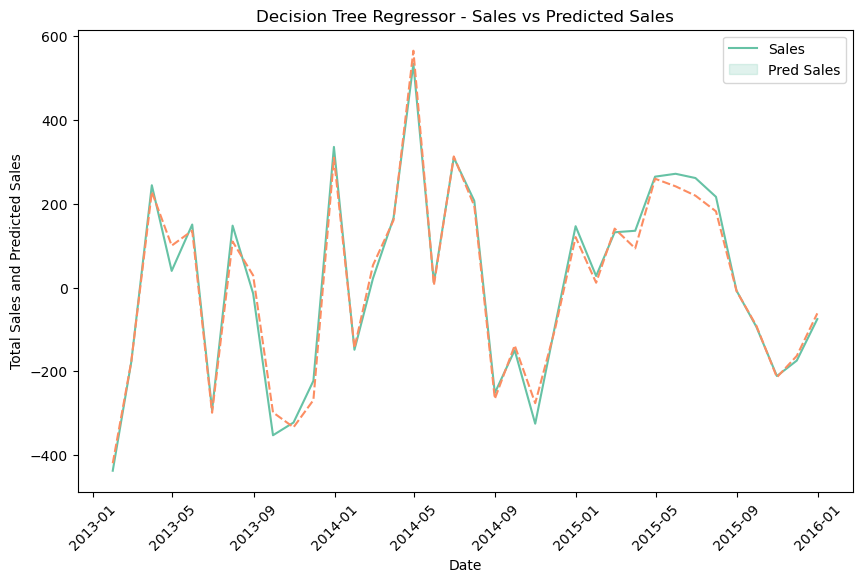

The Mean Absolute Error for the validation set is 0.180158
The Mean Squared Error for the validation set is 0.063073
The Root Mean Squared Error for the validation set is 0.251143
The R^2 for the validation set is 0.936523
The Adjusted R^2 for the validation set is 0.936493


In [83]:
#decision tree evaluation

# Evaluate the decision tree model
decision_tree_results = model_evaluation('Decision Tree Regressor', dt_basic, X_train, y_train, X_test, y_test)

In [84]:
#add results to comparison df
add_list_to_final_df(decision_tree_results)

In [85]:
# Printing the updated comparison DataFrame
comparison_df

,Model,MAE Train,MSE Train,RMSE Train,R2 Train,Adj R2 Train,MAE Test,MSE Test,RMSE Test,R2 Test,Adj R2 Test
0,Decision Tree Regressor,0.0,0.0,0.0,1.0,1.0,0.180158,0.063073,0.251143,0.936523,0.936493


#### Observation:
- The baseline model- Decision tree was chosen considering our features were mostly categorical with few having continuous importance. The above results show that a simple decision tree is performing pretty well on the validation set but it has completely overfitted the train set. It's better to have a much more generalized model for future data points. 
- Businesses prefer the model to be interpretable in nature in order to understand the patterns and strategize accordingly unlike any scientific facility where the results matter much more than interpretability.
- If interpretability is important then sticking with tree based algorithms when most of the features are categorical; is beneficial and using tuned Hyperparameters to grow the tree deep enough without overfitting.

### Random Forest

In [86]:
# importing
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [87]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

# # Sample Data Preparation (assuming df1 is your DataFrame)
# # df1 = pd.read_csv('path_to_your_file.csv')  # Load your data here

# # Prepare features and target variable
# X = df1.drop(columns=['Sales'])
# y = df1[['Sales']]  # Convert to DataFrame to retain index

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Retain original index of y_test for plotting
# y_test_original_index = y_test.index

# # Initialize and apply the OneHotEncoder
# encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
# encoder.fit(X_train[categorical_cols])
# encoded_features = encoder.get_feature_names_out(categorical_cols)

# X_train_encoded = pd.DataFrame(encoder.transform(X_train[categorical_cols]), columns=encoded_features, index=X_train.index)
# X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), columns=encoded_features, index=X_test.index)

# X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
# X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

# # Scaling features
# scaler = StandardScaler()
# X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
# X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# # Initialize the RandomForestRegressor
# random_forest = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

# # Fit the model
# random_forest.fit(X_train, y_train.values.ravel())

# # Define comparison columns globally
# comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2', 'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

# # Initialize comparison DataFrame
# comparison_df = pd.DataFrame(columns=comparison_columns)

# # Function to evaluate the model and return results as a dictionary
# def model_evaluation(model_name, model, X_train, y_train, X_test, y_test):
#     y_test_original_index = y_test.index
    
#     train_predictions = model.predict(X_train)
#     test_predictions = model.predict(X_test)
    
#     train_mae = mean_absolute_error(y_train, train_predictions)
#     test_mae = mean_absolute_error(y_test, test_predictions)
#     train_mse = mean_squared_error(y_train, train_predictions)
#     test_mse = mean_squared_error(y_test, test_predictions)
#     train_rmse = np.sqrt(train_mse)
#     test_rmse = np.sqrt(test_mse)
#     train_r2 = r2_score(y_train, train_predictions)
#     test_r2 = r2_score(y_test, test_predictions)
    
#     n_train = len(y_train)
#     n_test = len(y_test)
#     p = X_train.shape[1]
    
#     train_adj_r2 = 1 - (1-train_r2) * (n_train - 1) / (n_train - p - 1)
#     test_adj_r2 = 1 - (1-test_r2) * (n_test - 1) / (n_test - p - 1)
    
#     results = {
#         "Model_Name": model_name,
#         "Train_MAE": train_mae,
#         "Train_MSE": train_mse,
#         "Train_RMSE": train_rmse,
#         "Train_R2": train_r2,
#         "Train_Adj_R2": train_adj_r2,
#         "Test_MAE": test_mae,
#         "Test_MSE": test_mse,
#         "Test_RMSE": test_rmse,
#         "Test_R2": test_r2,
#         "Test_Adj_R2": test_adj_r2
#     }
    
#     # Print evaluation metrics
#     print(f'The Mean Absolute Error for the validation set is {test_mae}')
#     print(f'The Mean Squared Error for the validation set is {test_mse}')
#     print(f'The Root Mean Squared Error for the validation set is {test_rmse}')
#     print(f'The R^2 for the validation set is {test_r2}')
#     print(f'The Adjusted R^2 for the validation set is {test_adj_r2}')

#     # Create a DataFrame for plotting
#     plot_df = pd.DataFrame({
#         'Date': y_test_original_index,  # Using original index for dates
#         'Sales': y_test.values.flatten(),  # Actual sales values
#         'Pred Sales': test_predictions  # Predicted sales values
#     })
#     plot_df.set_index('Date', inplace=True)

#     # Plot the test results
#     plt.figure(figsize=(10, 6))
#     sns.lineplot(data=plot_df, x=plot_df.index, y="Sales")
#     sns.lineplot(data=plot_df, x=plot_df.index, y="Pred Sales", linestyle="--")
#     plt.ylabel("Total Sales and Predicted Sales")
#     plt.xticks(rotation=45)
#     plt.title(f'{model_name} - Sales vs Predicted Sales')
#     plt.legend(labels=['Sales', 'Pred Sales'])
#     plt.show()

#     return results

# # Evaluate the random forest model
# random_forest_results = model_evaluation('Random Forest Regressor', random_forest, X_train, y_train, X_test, y_test)

# # Append the results to the comparison DataFrame
# comparison_df = pd.DataFrame(columns=comparison_columns)
# comparison_df = comparison_df.append(random_forest_results, ignore_index=True)

# # Display the comparison DataFrame
# print(comparison_df)

In [90]:
# fitting
random_forest = RandomForestRegressor(n_estimators=100,random_state=42)
random_forest.fit(X_train,y_train)
# Alternate code for fitting but this does take more time

RandomForestRegressor(random_state=42)

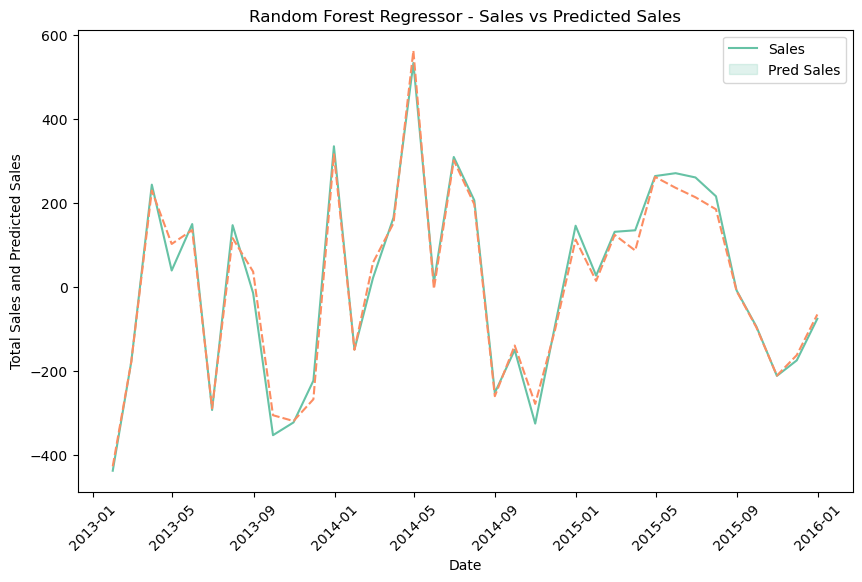

The Mean Absolute Error for the validation set is 0.129724
The Mean Squared Error for the validation set is 0.031685
The Root Mean Squared Error for the validation set is 0.178003
The R^2 for the validation set is 0.968112
The Adjusted R^2 for the validation set is 0.968097


In [91]:
#model evaluation 
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [92]:
# updating comparison df
add_list_to_final_df(random_f)

In [93]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


#### Observation:
Random Forest Regressor results were much better than our baseline model. Next we'll try to tune the hyperparameters and check the results.

In [94]:
#creating a csv file for the cleaned dataset

# Load the raw data (replace 'raw_data.csv' with your actual file name)
df_raw = pd.read_csv("merge_data.csv", parse_dates=['Date'])

# Display the first few rows of the raw data
df_raw.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [95]:
df_cleaned = df_raw.fillna(method='ffill')

# Convert categorical features to numeric using OneHotEncoder
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(df_cleaned[categorical_cols])
encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

# Convert encoded features to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df_cleaned.index)

# Drop original categorical columns and concatenate encoded features
df_cleaned = df_cleaned.drop(columns=categorical_cols)
df_cleaned = pd.concat([df_cleaned, encoded_df], axis=1)

# Save the cleaned data to a CSV file
cleaned_data = df_cleaned.to_csv("cleaned_data.csv")

In [96]:
#creating a csv file for the comparison dataframe
results = comparison_df.to_csv("results.csv")

### Random Forest Hyperparameter Tuning

In [97]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

import warnings    
warnings.filterwarnings('ignore')

In [98]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#importing model 
from sklearn.ensemble import RandomForestRegressor

In [99]:
#reading data
df2 = pd.read_csv("Cleaned_data.csv",parse_dates=['Date'])
comparison_df = pd.read_csv("results.csv")

In [100]:
#setting date and store as index
df2.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df2.sort_index(inplace=True)

In [101]:
comparison_df.drop('Unnamed: 0',axis=1,inplace=True)
comparison_df

,Model,MAE Train,MSE Train,RMSE Train,R2 Train,Adj R2 Train,MAE Test,MSE Test,RMSE Test,R2 Test,Adj R2 Test
0,Decision Tree Regressor,0.000000,0.000000,0.000000,1.000000,1.000000,0.180158,0.063073,0.251143,0.936523,0.936493
1,Random Forest Regressor,0.047943,0.004324,0.065759,0.995676,0.995675,0.129724,0.031685,0.178003,0.968112,0.968097


In [102]:
df2.head(1)

,,Unnamed: 0,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
Date,Store,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,1016095,0,0,0,0,a,1,1270.0,9.0,2008.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [103]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [104]:
#X and y split for train and test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (931354, 27)
The shape of y_train is: (931354, 1)
The shape of X_test is: (46830, 27)
The shape of y_test is: (46830, 1)


In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Assuming merge_data is your DataFrame

# Perform data cleaning steps
# Fill missing values
merge_data = merge_data.fillna(method='ffill')

# Ensure all remaining columns are numeric
print(merge_data.dtypes)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
merge_data = pd.DataFrame(imputer.fit_transform(merge_data), columns=merge_data.columns)

# Prepare features and target variable
X = merge_data.drop(columns=['Sales'])
y = merge_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

# Fit the model
random_forest.fit(X_train, y_train.values.ravel())

# Define comparison columns globally
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2', 'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

# Initialize comparison DataFrame
comparison_df = pd.DataFrame(columns=comparison_columns)

# Function to evaluate the model and return results as a dictionary
def model_evaluation(model_name, model, X_train, y_train, X_test, y_test):
    y_test_original_index = y_test.index
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    
    n_train = len(y_train)
    n_test = len(y_test)
    p = X_train.shape[1]
    
    train_adj_r2 = 1 - (1-train_r2) * (n_train - 1) / (n_train - p - 1)
    test_adj_r2 = 1 - (1-test_r2) * (n_test - 1) / (n_test - p - 1)
    
    results = {
        "Model_Name": model_name,
        "Train_MAE": train_mae,
        "Train_MSE": train_mse,
        "Train_RMSE": train_rmse,
        "Train_R2": train_r2,
        "Train_Adj_R2": train_adj_r2,
        "Test_MAE": test_mae,
        "Test_MSE": test_mse,
        "Test_RMSE": test_rmse,
        "Test_R2": test_r2,
        "Test_Adj_R2": test_adj_r2
    }
    
    # Print evaluation metrics
    print(f'The Mean Absolute Error for the validation set is {test_mae}')
    print(f'The Mean Squared Error for the validation set is {test_mse}')
    print(f'The Root Mean Squared Error for the validation set is {test_rmse}')
    print(f'The R^2 for the validation set is {test_r2}')
    print(f'The Adjusted R^2 for the validation set is {test_adj_r2}')

# Evaluate the random forest model
random_forest_results = model_evaluation('Random Forest Regressor', random_forest, X_train, y_train, X_test, y_test)

# Append the results to the comparison DataFrame
comparison_df = pd.DataFrame(columns=comparison_columns)
comparison_df = comparison_df.append(random_forest_results, ignore_index=True)

# Display the comparison DataFrame
print(comparison_df)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
Year                                  int64
Month                                 int64
WeekOfYear                           UInt32
DayOfYear                             int64
dtype: object


TypeError: Cannot cast DatetimeArray to dtype float64

In [ ]:
# Convert date column to datetime if it's not already
merge_data['Date'] = pd.to_datetime(merge_data['Date'])

# Extract date features
merge_data['Year'] = merge_data['Date'].dt.year
merge_data['Month'] = merge_data['Date'].dt.month
merge_data['Day'] = merge_data['Date'].dt.day
merge_data['DayOfWeek'] = merge_data['Date'].dt.dayofweek

# Convert 'PromoInterval' to numeric features
def convert_promo_interval(row):
    if pd.isna(row['PromoInterval']):
        return 0
    months = row['PromoInterval'].split(',')
    current_month = row['Month']
    if any(month in months for month in ['Jan', 'Feb', 'Mar']) and current_month in [1, 2, 3]:
        return 1
    elif any(month in months for month in ['Apr', 'May', 'Jun']) and current_month in [4, 5, 6]:
        return 1
    elif any(month in months for month in ['Jul', 'Aug', 'Sep']) and current_month in [7, 8, 9]:
        return 1
    elif any(month in months for month in ['Oct', 'Nov', 'Dec']) and current_month in [10, 11, 12]:
        return 1
    else:
        return 0

merge_data['Promo2Active'] = merge_data.apply(convert_promo_interval, axis=1)

# Drop the original 'PromoInterval' column
merge_data = merge_data.drop(columns=['PromoInterval'])

# Drop the original Date column
merge_data = merge_data.drop(columns=['Date'])

# Perform data cleaning steps
# Fill missing values
merge_data = merge_data.fillna(method='ffill')

# Adjust categorical columns based on the actual column names
categorical_cols = ['StoreType', 'Assortment', 'StateHoliday']  # Replace with actual column names if different

# Convert all values in the categorical columns to strings to ensure uniform data type
for col in categorical_cols:
    merge_data[col] = merge_data[col].astype(str)

# Convert categorical features to numeric using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the categorical features if they exist
if all(col in merge_data.columns for col in categorical_cols):
    encoded_features = encoder.fit_transform(merge_data[categorical_cols])
    encoded_feature_names = encoder.get_feature_names_out(categorical_cols)

    # Convert encoded features to DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=merge_data.index)

    # Drop original categorical columns and concatenate encoded features
    merge_data = merge_data.drop(columns=categorical_cols)
    merge_data = pd.concat([merge_data, encoded_df], axis=1)

# Ensure all remaining columns are numeric
print(merge_data.dtypes)

# Prepare features and target variable
X = merge_data.drop(columns=['Sales'])
y = merge_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Create model

rf_tuned = RandomForestRegressor(random_state=42)

# Hyperparameter grid
random_grid = {
    'bootstrap': [True, False],
    'max_depth': [90, 100, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 8],
    'n_estimators': [100, 130, 150]
}

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_tuned, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

In [ ]:
# Best parameters from the random search
print("Best Parameters:", rf_random.best_params_)

# Evaluate the best model on the test data
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

In [ ]:
#save the best parameters
random_t = rf_random.best_estimator_

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Test_Adj_R2']

In [ ]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
    ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
        and creates a dataframe that compares the various models.'''
        
    #making predictions
    y_pred_train = model_variable.predict(X_train)
    y_pred_test = model_variable.predict(X_test)
  
    # Plot the test results
    a = y_test.copy()
    a['Pred Sales'] = y_pred_test.tolist()
    df_plot = a.reset_index(level=['Date'])
    plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
    sns.lineplot(data = plot)
    plt.ylabel("Total Sales and Predicted Sales")
    plt.xticks(rotation = 25)
  
    #calculate metrics and print the results for test set
    #Mean Absolute Error or MAE
    MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
    MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
    #Mean Squared Error or MSE
    MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
    MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
    #Root Mean Squared Error or RMSE
    RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
    RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
    #R2
    R2_train = round(r2_score(y_train, y_pred_train),6)
    R2_test = round(r2_score(y_test, y_pred_test),6)
    #Adjusted R2
    Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
    Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  
    #printing test results
    print(f'The Mean Absolute Error for the validation set is {MAE_test}')
    print(f'The Mean Squared Error for the validation set is {MSE_test}')
    print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
    print(f'The R^2 for the validation set is {R2_test}')
    print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')
  
    #Saving our results
    global comparison_columns
    metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
    final_dict = dict(zip(comparison_columns,metric_scores))
    return [final_dict]

In [ ]:
#evaluate tuned model
random_tuned = model_evaluation('Random Forest Tuned', best_rf, X_train_selected, y_train, X_test_selected, y_test)

In [ ]:
#add to comparison_df
comparison_df = comparison_df.append(random_tuned)

In [ ]:
comparison_df

#### Feature Importance

In [ ]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])

## <a id='top'></a> <a id="title-five"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Model Performance and Evaluation</center></h1>

In [ ]:
#Taking a look of our final comparison dataframe
comparison_df

In [ ]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

#### Random Forest vs Baseline Model

In [ ]:
#test values
baseline_r2 = 0.915750
random_r2 = 0.955673
r_tuned_r2 = 0.955878

In [ ]:
#improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

#### Random Forest Tuned vs Baseline and Random Forest Models

In [ ]:
#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

In [ ]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Observation

* The maximum R^2 was seen in tuned Random Forest model with the value 0.955878 which was only 0.021% improved from a simple random forest model. 
* It seems like we have maxed out on performance with the data and these models.

## <a id='top'></a> <a id="title-six"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2> Store wise Sales Predictions</center></h1>

In [ ]:
#predictions 
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [ ]:
#head
six_weeks_sales_df.head()

In [ ]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= pd.read_csv("/content/drive/MyDrive/ALMABETTER/CAPSTONE PROJECTS/Retail Sales Prediction - Vithika Karan/Cleaned Data/Cleaned_Unscaled_data.csv")
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])

In [ ]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [ ]:
#sales vs predictions
six_weeks_sales_df.head()

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]

## <a id='top'></a> <a id="title-seven"></a>
<div class="list-group" id="list-tab" role="tablist"> <h1 style='background:#5ced73;border-radius: 10px; color:black;height: 48px'><center><h2>Conclusion and Recommendations</center></h1>

    
**Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various XYZ stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations** </a> <a id="title-eight"></a>
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.
